#A. Business Background

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This is a credit history of the customers from a financial institution. Agenda is to predict for possible credit defaulters upfront and help the financial institutions to take steps accordingly.



## Overview

LendingClub Corporation (NYSE : LC) is the parent company of LendingClub Bank, National Association, Member FDIC. LendingClub Bank is the leading digital marketplace bank in the U.S., where members can access a broad range of financial products and services designed to help them pay less when borrowing and earn more when saving. Based on more than 150 billion cells of data and over $75 billion in loans, our advanced credit decisioning and machine-learning models are used across the customer lifecycle to expand seamless access to credit for our members, while generating compelling risk-adjusted returns for our loan investors. Since 2007, more than 4 million members have joined the Club to help reach their financial goals. For more information about LendingClub.


* https://ir.lendingclub.com/home/default.aspx


# B. Dataset

##**Loan (Google Drive) :**
* https://drive.google.com/file/d/10K1RwCxmrvEfarU1f6-W4nyKNPBRZG4N/view?usp=drive_link

##**Data Dictionary :**
* https://docs.google.com/spreadsheets/d/1iPK1wZ4wqJc0jKJvsDrR0JRMXYKYgCml/edit?usp=drive_link&ouid=106388925887876498460&rtpof=true&sd=true

#C. Data Preparation

### Import Library

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

### Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Lending Club/loan.csv')


<ipython-input-388-bb819868c43e>:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/gdrive/MyDrive/Lending Club/loan.csv')


#D. Data Clenaning step 1

In [ ]:
# Showing 5 data records
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Make a copy of the original data for data cleaning
df_loan_dc = df.copy ()
df_loan_dc

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


####Check Data Type

In [ ]:
# Check how much column and rows
df_loan_dc.shape

(887379, 74)

In [ ]:
# Check table info
df_loan_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

Insight :
* 'id' and 'member_id' change into string
* 'issue_d' change into datetime

In [ ]:
# Change 'id' data type into string
df_loan_dc['id'] = df_loan_dc['id'].astype(str)

In [ ]:
# Check the datatype of 'id' after replaced
df_loan_dc['id'].dtype

dtype('O')

In [ ]:
#Change 'member_id' data type into string
df_loan_dc['member_id'] = df_loan_dc['member_id'].astype(str)

In [ ]:
#Check the datatype of 'member_id' after replaced
df_loan_dc['member_id'].dtype

dtype('O')

O stands for object, the data succesfult converted into string

In [ ]:
# Change 'issue_d' data type into datetime
df_loan_dc['issue_d'] = pd.to_datetime(df_loan_dc['issue_d'])
df_loan_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           887379 non-null  object        
 1   member_id                    887379 non-null  object        
 2   loan_amnt                    887379 non-null  float64       
 3   funded_amnt                  887379 non-null  float64       
 4   funded_amnt_inv              887379 non-null  float64       
 5   term                         887379 non-null  object        
 6   int_rate                     887379 non-null  float64       
 7   installment                  887379 non-null  float64       
 8   grade                        887379 non-null  object        
 9   sub_grade                    887379 non-null  object        
 10  emp_title                    835917 non-null  object        
 11  emp_length                

## Rename and Add New Column & Extract Value


In [ ]:
# Extract 'issue_d' to 'issue_month'
df_loan_dc['issue_month'] = df_loan_dc['issue_d'].dt.month

# Extract 'issue_d' to 'issue_year'
df_loan_dc['issue_year'] = df_loan_dc['issue_d'].dt.year

print(df_loan_dc)

              id member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0        1077501   1296599     5000.0       5000.0           4975.0   
1        1077430   1314167     2500.0       2500.0           2500.0   
2        1077175   1313524     2400.0       2400.0           2400.0   
3        1076863   1277178    10000.0      10000.0          10000.0   
4        1075358   1311748     3000.0       3000.0           3000.0   
...          ...       ...        ...          ...              ...   
887374  36371250  39102635    10000.0      10000.0          10000.0   
887375  36441262  39152692    24000.0      24000.0          24000.0   
887376  36271333  38982739    13000.0      13000.0          13000.0   
887377  36490806  39222577    12000.0      12000.0          12000.0   
887378  36271262  38982659    20000.0      20000.0          20000.0   

              term  int_rate  installment grade sub_grade  ... open_rv_12m  \
0        36 months     10.65       162.87     B        B2  ...       

## Rename Value Name

In [ ]:
# Proper values of home_'ownership' column to be proper
df_loan_dc['home_ownership'] = df_loan_dc['home_ownership'].str.title()

print(df_loan_dc['home_ownership'].value_counts())

Mortgage    443557
Rent        356117
Own          87470
Other          182
None            50
Any              3
Name: home_ownership, dtype: int64


In [ ]:
# Rename value '10+ years' to be '> 10 years' dalam kolom 'emp_length'
df_loan_dc['emp_length'] = df_loan_dc['emp_length'].replace('10+ years', '> 10 years')

print(df_loan_dc['emp_length'].value_counts())

> 10 years    291569
2 years        78870
< 1 year       70605
3 years        70026
1 year         57095
5 years        55704
4 years        52529
7 years        44594
8 years        43955
6 years        42950
9 years        34657
Name: emp_length, dtype: int64


In [ ]:
# Rename values of 'loan_status'
df_loan_dc['loan_status'] = df_loan_dc['loan_status'].replace({
    'Does not meet the credit policy. Status:Charged Off': 'Charged Off (180 up days)',
    'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid',
    'Charged Off': 'Charged Off (180 up days)',
    'Default': 'Default (121-180 days)' })

print(df_loan_dc['loan_status'].value_counts())

Current                      601779
Fully Paid                   209711
Charged Off (180 up days)     46009
Late (31-120 days)            11591
Issued                         8460
In Grace Period                6253
Late (16-30 days)              2357
Default (121-180 days)         1219
Name: loan_status, dtype: int64


Insight :
* 'Does not meet the credit policy. Status:Charged Off' and 'Charged Off' have the same meaning.
* 'Does not meet the credit policy. Status:Fully Paid' and 'Fully Paid' also have the same meaning according to Data Dictionary.
* 'Charged Off' becomes 'Charged Off (180 up days)'.
* 'Default' becomes 'Default (121-180 days)'.

## Proper Value Name

In [ ]:
# Proper values of home_'application_type' column to be proper
df_loan_dc['application_type'] = df_loan_dc['application_type'].str.title()

print(df_loan_dc['application_type'].value_counts())

Individual    886868
Joint            511
Name: application_type, dtype: int64


In [ ]:
# Check the duplicate
df_loan_dc[df_loan_dc['id'].duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issue_month,issue_year


## Check Null Values

In [ ]:
# Check how much null values exist
df_loan_dc.isnull().sum()

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
                    ...  
inq_fi             866007
total_cu_tl        866007
inq_last_12m       866007
issue_month             0
issue_year              0
Length: 76, dtype: int64

Insight :
* emp_title, 5142 row null
* emp_length, 44825 row null
* desc, 766751 row null
* title, 152 row null
* delinq_2yrs, 29 row null
* mths_since_last_delinq, 454312 row null
* mths_since_last_record, 750326 row null
* open_acc, 29 row null
* public_rec, 29 row null
* revol_util, 502 row null
* total_acc, 29 row null
* next_pymnt_d, 2522971 row null
* last_credit_pull_d, 53 row null
* collections_12_mths_ex_med, 145 row null
* mths_since_last_major_derog, 665676 row null
* annual_inc_joint, 886868 row null
* annual_inc_joint, 4 row null
* dti_joint, 868870 row null
* verification_status_joint, 886868 row null
* acc_now_delinq, 29 row null
* tot_coll_amt, 70276 row null
* tot_cur_bal, 70276 row null
* open_acc_6m, 866007 row null
* open_il_6m, 866007 row null
* open_il_12m, 866007 row null
* open_il_24m, 866007 row null
* mths_since_rcnt_il, 866569 row null
* total_bal_il, 866007 row null
* il_util, 868762 row null
* open_rv_12m, 866007 row null
* max_bal_bc, 866007 row null
* open_rv_12m, 866007 row null
* all_util, 866007 row null
* total_rev_hi_lim, 70276 row null
* inq_fi, 866007 row null
* total_cu_tl, 866007 row null
* inq_last_12m, 866007 row null

In [ ]:
# Check columns
df_loan_dc.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

##  Removing Irrelevant Coloumn

In [ ]:
# Drop columns that are not really needed in data analysis
columns_to_drop = [ 'funded_amnt', 'funded_amnt_inv', 'desc',
                    'dti', 'delinq_2yrs', 'pymnt_plan', 'url', 'title',
                    'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
                    'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
                    'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
                    'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                    'total_rec_int', 'total_rec_late_fee', 'recoveries',
                    'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
                    'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
                    'mths_since_last_major_derog', 'policy_code',
                    'annual_inc_joint', 'dti_joint', 'verification_status_joint',
                    'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
                    'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
                    'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
                    'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m' ]

df_loan_dc = df_loan_dc.drop(columns=columns_to_drop)

In [ ]:
# Check columns after drop columns
df_loan_dc.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'application_type', 'issue_month',
       'issue_year'],
      dtype='object')

In [ ]:
# Check the top 5 rows
df_loan_dc.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,application_type,issue_month,issue_year
0,1077501,1296599,5000.0,36 months,10.65,162.87,B,B2,NaN,> 10 years,...,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,Individual,12,2011
1,1077430,1314167,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,30000.0,Source Verified,2011-12-01,Charged Off (180 up days),car,309xx,GA,Individual,12,2011
2,1077175,1313524,2400.0,36 months,15.96,84.33,C,C5,NaN,> 10 years,...,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,Individual,12,2011
3,1076863,1277178,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,> 10 years,...,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,Individual,12,2011
4,1075358,1311748,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,80000.0,Source Verified,2011-12-01,Current,other,972xx,OR,Individual,12,2011


In [ ]:
# Check the bottom 5 rows
df_loan_dc.tail()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,application_type,issue_month,issue_year
887374,36371250,39102635,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,...,31000.0,Verified,2015-01-01,Current,debt_consolidation,905xx,CA,Individual,1,2015
887375,36441262,39152692,24000.0,36 months,11.99,797.03,B,B5,Director of Maintenance,> 10 years,...,79000.0,Verified,2015-01-01,Current,home_improvement,072xx,NJ,Individual,1,2015
887376,36271333,38982739,13000.0,60 months,15.99,316.07,D,D2,Radiologist Technologist,5 years,...,35000.0,Verified,2015-01-01,Current,debt_consolidation,378xx,TN,Individual,1,2015
887377,36490806,39222577,12000.0,60 months,19.99,317.86,E,E3,Painter,1 year,...,64400.0,Source Verified,2015-01-01,Current,debt_consolidation,010xx,MA,Individual,1,2015
887378,36271262,38982659,20000.0,36 months,11.99,664.20,B,B5,Manager Hotel Operations Oasis,> 10 years,...,100000.0,Verified,2015-01-01,Current,credit_card,331xx,FL,Individual,1,2015


In [ ]:
# Check table index
df_loan_dc.index

RangeIndex(start=0, stop=887379, step=1)

Insight :
* Delete several columns that are not needed for further analysis, only the columns and variables that are needed

In [ ]:
# Check table info after drop columns
df_loan_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   887379 non-null  object        
 1   member_id            887379 non-null  object        
 2   loan_amnt            887379 non-null  float64       
 3   term                 887379 non-null  object        
 4   int_rate             887379 non-null  float64       
 5   installment          887379 non-null  float64       
 6   grade                887379 non-null  object        
 7   sub_grade            887379 non-null  object        
 8   emp_title            835917 non-null  object        
 9   emp_length           842554 non-null  object        
 10  home_ownership       887379 non-null  object        
 11  annual_inc           887375 non-null  float64       
 12  verification_status  887379 non-null  object        
 13  issue_d       

#E. Data Analysis

## Loan Status

In [ ]:
# Checking the values for 'loan_status'
df_loan_dc[df_loan_dc.columns[14]].value_counts()

Current                      601779
Fully Paid                   209711
Charged Off (180 up days)     46009
Late (31-120 days)            11591
Issued                         8460
In Grace Period                6253
Late (16-30 days)              2357
Default (121-180 days)         1219
Name: loan_status, dtype: int64

In [ ]:
# percentage(%)
loan_status_count = df_loan_dc[['id', 'loan_status']].groupby(['loan_status']).size().reset_index(name='count')
total_loans = loan_status_count['count'].sum()
loan_status_count['percentage(%)'] = ((loan_status_count['count'] / total_loans) * 100).astype('float')

loan_status_count = loan_status_count.sort_values(by='count', ascending=False)

print(loan_status_count)

                 loan_status   count  percentage(%)
1                    Current  601779      67.815330
3                 Fully Paid  209711      23.632630
0  Charged Off (180 up days)   46009       5.184820
7         Late (31-120 days)   11591       1.306206
5                     Issued    8460       0.953369
4            In Grace Period    6253       0.704659
6          Late (16-30 days)    2357       0.265614
2     Default (121-180 days)    1219       0.137371


* **Current :** Pembayaran dilakukan sesuai jadwal / lancar.
* **Fully Paid :** Pinjaman telah sepenuhnya dilunasi oleh peminjam /  **Paid Off.**
* **Charged Off :** Pinjaman dianggap tidak dapat dipulihkan dan dihapuskan sebagai kerugian oleh pemberi pinjaman / piutang yang tidak tertagih **(Write Off : 181 up days)**.
* **Late (31-120 days) :** Pembayaran pinjaman terlambat selama **31 hingga 120 hari.**
* **Issued :** Pinjaman telah diterbitkan kepada peminjam.
* **In Grace Period :** Peminjam berada dalam periode toleransi di mana pembayaran terlambat masih diterima tanpa dikenakan denda selama **1-15 hari.**
* **Late (16-30 days) :** Pembayaran pinjaman terlambat selama **16 hingga 30 hari.**
* **Default :** Peminjam gagal membayar pinjaman atau memenuhi kewajiban pembayaran secara keseluruhan **(121-180 days).**

In [ ]:
# Current payments
excluded_values = ['Charged Off (180 up days)',
                   'Late (31-120 days)',
                   'Late (16-30 days)',
                   'Default (121-180 days)']
count_loan_status_excluded = df_loan_dc[df_loan_dc.columns[14]].loc[~df_loan_dc[df_loan_dc.columns[16]].isin(excluded_values)].value_counts()
print(count_loan_status_excluded)

Current                      601779
Fully Paid                   209711
Charged Off (180 up days)     46009
Late (31-120 days)            11591
Issued                         8460
In Grace Period                6253
Late (16-30 days)              2357
Default (121-180 days)         1219
Name: loan_status, dtype: int64


In [ ]:
# Total current payments
601779 + 209711 + 8460 + 6253

826203

In [ ]:
# % Current
826203/88379

9.348408558594237

## Non Performing Loan (NPL)

In [ ]:
# Non-current Loan Status (NPL)
non_current = ['Charged Off (180 up days)',
               'Late (31-120 days)',
               'Late (16-30 days)',
               'Default (121-180 days)']
loan_status_count = df_loan_dc[df_loan_dc['loan_status'].isin(non_current)][['id', 'loan_status']].groupby(['loan_status']).size().reset_index(name='count')

total_loans = loan_status_count['count'].sum()
loan_status_count['percentage(%)'] = ((loan_status_count['count'] / total_loans) * 100).astype('float')
loan_status_count = loan_status_count.sort_values(by='count', ascending=False)
loan_status_count['percentage(%)'] = loan_status_count['percentage(%)'].round(2)

print(loan_status_count)


                 loan_status  count  percentage(%)
0  Charged Off (180 up days)  46009          75.21
3         Late (31-120 days)  11591          18.95
2          Late (16-30 days)   2357           3.85
1     Default (121-180 days)   1219           1.99


In [ ]:
# Total non-current payments / NPL
46009 + 11591 + 2357 + 1219

61176

In [ ]:
# % non-current / NPL
61176/887379

0.06894010338310913

Insight :
* The number of Non Performing Loan (NPL) categories was 6.89% of the total 887379 users

In [ ]:
# Loan_status add to loan_status_group
status_grouping = {'Current': 'current',
                  'Fully Paid': 'current',
                  'Issued': 'current',
                  'In Grace Period': 'current',
                  'Charged Off (180 up days)': 'non_current',
                  'Default (121-180 days)': 'non_current',
                  'Late (31-120 days)': 'non_current',
                  'Late (16-30 days)': 'non_current' }

# Add new coloumn
df_loan_dc['loan_status_group'] = df_loan_dc['loan_status'].map(status_grouping)

print(df_loan_dc[['loan_status', 'loan_status_group']])

                      loan_status loan_status_group
0                      Fully Paid           current
1       Charged Off (180 up days)       non_current
2                      Fully Paid           current
3                      Fully Paid           current
4                         Current           current
...                           ...               ...
887374                    Current           current
887375                    Current           current
887376                    Current           current
887377                    Current           current
887378                    Current           current

[887379 rows x 2 columns]


In [ ]:
# All current & non-current loan_status
loan_status_group = ['current', 'non_current']

loan_status_group_count = df_loan_dc[df_loan_dc['loan_status_group'].isin(loan_status_group)][['id', 'loan_status_group']].groupby(['loan_status_group']).size().reset_index(name='count')

total_loans = loan_status_group_count['count'].sum()
loan_status_group_count['percentage(%)'] = ((loan_status_group_count['count'] / total_loans) * 100).astype('float')
loan_status_group_count = loan_status_group_count.sort_values(by='count', ascending=False)
loan_status_group_count['percentage(%)'] = loan_status_group_count['percentage(%)'].round(2)

print(loan_status_group_count)


  loan_status_group   count  percentage(%)
0           current  826203          93.11
1       non_current   61176           6.89


## Issue Year

In [ ]:
# Checking the values for 'issue_year'
df_loan_dc[df_loan_dc.columns[20]].value_counts()

2015    421094
2014    235628
2013    134755
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
Name: issue_year, dtype: int64

In [ ]:
# Checking the values for 'issue_month'
df_loan_dc[df_loan_dc.columns[20]].value_counts()

2015    421094
2014    235628
2013    134755
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
Name: issue_year, dtype: int64

In [ ]:
# Counts of non-current based on 'issue_year' and 'loan status' that are 'Charged Off (180 up days)'
Charged_Off_180_up_days_issue_year_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Charged Off (180 up days)'][df_loan_dc.columns[20]].value_counts()
print(Charged_Off_180_up_days_issue_year_counts)

2013    14836
2014    13981
2012     8084
2011     3205
2015     2773
2010     1753
2009      723
2008      496
2007      158
Name: issue_year, dtype: int64


In [ ]:
# Counts of non-current based on 'issue_year' and 'loan status' that are 'Late (31-120 days)'
Late_31_120_days_issue_year_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Late (31-120 days)'][df_loan_dc.columns[20]].value_counts()
print(Late_31_120_days_issue_year_counts)

2014    4847
2015    4691
2013    1780
2012     222
2011      46
2010       5
Name: issue_year, dtype: int64


In [ ]:
# Counts of non-current based on 'issue_year' and 'loan status' that are 'Late (16-30 days)'
Late_16_30_days_issue_year_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Late (16-30 days)'][df_loan_dc.columns[20]].value_counts()
print(Late_16_30_days_issue_year_counts)

2015    1139
2014     858
2013     320
2012      27
2011      11
2010       2
Name: issue_year, dtype: int64


In [ ]:
# Counts of non-current based on 'issue_year' and 'loan status' that are 'Default (121-180 days) '
Default_121_180_days_issue_year_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Default (121-180 days)'][df_loan_dc.columns[20]].value_counts()
print(Default_121_180_days_issue_year_counts)

2014    613
2015    387
2013    182
2012     28
2011      8
2010      1
Name: issue_year, dtype: int64


In [ ]:
# Non-current Term (NPL)
loan_status = ['Charged Off (180 up days)', 'Late (31-120 days)', 'Late (16-30 days)', 'Default (121-180 days)']

non_current_teissue_year_count = df_loan_dc[df_loan_dc['loan_status'].isin(loan_status)][['id', 'issue_year']].groupby(['issue_year']).size().reset_index(name='count')

total_loans = non_current_teissue_year_count['count'].sum()
non_current_teissue_year_count['percentage(%)'] = ((non_current_teissue_year_count['count'] / total_loans) * 100).astype('float')
non_current_teissue_year_count = non_current_teissue_year_count.sort_values(by='count', ascending=False)
non_current_teissue_year_count['percentage(%)'] = non_current_teissue_year_count['percentage(%)'].round(2)

print(non_current_teissue_year_count)


   issue_year  count  percentage(%)
7        2014  20299          33.18
6        2013  17118          27.98
8        2015   8990          14.70
5        2012   8361          13.67
4        2011   3270           5.35
3        2010   1761           2.88
2        2009    723           1.18
1        2008    496           0.81
0        2007    158           0.26


## Term - Loan

In [ ]:
# Checking the values for 'term'
df_loan_dc[df_loan_dc.columns[3]].value_counts()

 36 months    621125
 60 months    266254
Name: term, dtype: int64

In [ ]:
# Counts of non-current based on 'term' and 'loan status' that are 'Charged Off (180 up days)'
Charged_Off_180_up_days_term_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Charged Off (180 up days)'][df_loan_dc.columns[3]].value_counts()
print(Charged_Off_180_up_days_term_counts)

 36 months    29732
 60 months    16277
Name: term, dtype: int64


In [ ]:
# Counts of non-current based on 'term' and 'loan status' that are 'Late (31-120 days)'
Late_31_120_days_term_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Late (31-120 days)'][df_loan_dc.columns[3]].value_counts()
print(Late_31_120_days_term_counts)

 36 months    7026
 60 months    4565
Name: term, dtype: int64


In [ ]:
# Counts of non-current based on 'term' and 'loan status' that are 'Late (16-30 days)'
Late_16_30_days_term_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Late (16-30 days)'][df_loan_dc.columns[3]].value_counts()
print(Late_16_30_days_term_counts)

 36 months    1483
 60 months     874
Name: term, dtype: int64


In [ ]:
# Counts of non-current based on 'term' and 'loan status' that are 'Default (121-180 days) '
Default_121_180_days_term_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Default (121-180 days)'][df_loan_dc.columns[3]].value_counts()
print(Default_121_180_days_term_counts)

 36 months    715
 60 months    504
Name: term, dtype: int64


In [ ]:
# Non-current Term (NPL)
loan_status = ['Charged Off (180 up days)', 'Late (31-120 days)', 'Late (16-30 days)', 'Default (121-180 days)']

non_current_term_count = df_loan_dc[df_loan_dc['loan_status'].isin(loan_status)][['id', 'term']].groupby(['term']).size().reset_index(name='count')

total_loans = non_current_term_count['count'].sum()
non_current_term_count['percentage(%)'] = ((non_current_term_count['count'] / total_loans) * 100).astype('float')
non_current_term_count = non_current_term_count.sort_values(by='count', ascending=False)
non_current_term_count['percentage(%)'] = non_current_term_count['percentage(%)'].round(2)

print(non_current_term_count)


         term  count  percentage(%)
0   36 months  38956          63.68
1   60 months  22220          36.32


## Loan Amount

In [ ]:
# Checking the values for 'loan_amnt'
df_loan_dc[df_loan_dc.columns[2]].value_counts()

10000.0    61837
12000.0    50183
15000.0    47210
20000.0    46932
35000.0    36368
           ...  
550.0          1
925.0          1
750.0          1
725.0          1
950.0          1
Name: loan_amnt, Length: 1372, dtype: int64

In [ ]:
# Checking the values for 'loan_amnt' and sorting by value counts
loan_amnt_counts_sorted = df_loan_dc['loan_amnt'].value_counts().sort_index(ascending=False)

print("Loan Amounts with Counts (sorted by value):")
print(loan_amnt_counts_sorted)


Loan Amounts with Counts (sorted by value):
35000.0    36368
34975.0       31
34950.0       18
34925.0        9
34900.0       14
           ...  
725.0          1
700.0          3
600.0          6
550.0          1
500.0         11
Name: loan_amnt, Length: 1372, dtype: int64


In [ ]:
# Add new column 'loan_amnt_range'
loan_amnt_range = { '<=1000': (0, 1000),
                    '>1000-10000': (1001, 10000),
                    '>10000-20000': (10001, 20000),
                    '>20000-30000': (20001, 30000),
                    '>30000': (30001, float('inf')) }

df_loan_dc['loan_amnt_range'] = np.select(
                [   (df_loan_dc['loan_amnt'] <= 1000),
                    (df_loan_dc['loan_amnt'] <= 10000),
                    (df_loan_dc['loan_amnt'] <= 20000),
                    (df_loan_dc['loan_amnt'] <= 30000),
                    (df_loan_dc['loan_amnt'] > 30000)
                ],
                list(loan_amnt_range.keys()),
                default='Unknown')

print(df_loan_dc[['loan_amnt', 'loan_amnt_range']])

        loan_amnt loan_amnt_range
0          5000.0     >1000-10000
1          2500.0     >1000-10000
2          2400.0     >1000-10000
3         10000.0     >1000-10000
4          3000.0     >1000-10000
...           ...             ...
887374    10000.0     >1000-10000
887375    24000.0    >20000-30000
887376    13000.0    >10000-20000
887377    12000.0    >10000-20000
887378    20000.0    >10000-20000

[887379 rows x 2 columns]


In [ ]:
# percentage(%) loan_amnt_range
loan_amnt_range = [ '<=1000',
                    '>>1000-10000',
                    '>10000-20000',
                    '>20000-30000',
                    '>30000' ]
loan_amnt_range_count = df_loan_dc[df_loan_dc['loan_amnt_range'].isin(loan_amnt_range)][['id', 'loan_amnt_range']].groupby(['loan_amnt_range']).size().reset_index(name='count')

total_loans = loan_amnt_range_count['count'].sum()
loan_amnt_range_count['percentage(%)'] = ((loan_amnt_range_count['count'] / total_loans) * 100).astype('float')
loan_amnt_range_count = loan_amnt_range_count.sort_values(by='count', ascending=False)
loan_amnt_range_count['percentage(%)'] = loan_amnt_range_count['percentage(%)'].round(2)

print(loan_amnt_range_count)

  loan_amnt_range   count  percentage(%)
1    >10000-20000  350962          63.30
2    >20000-30000  151210          27.27
3          >30000   49627           8.95
0          <=1000    2623           0.47


In [ ]:
# percentage(%) loan_amnt_range_count of non-current
loan_status = ['Charged Off (180 up days)',
               'Late (31-120 days)',
               'Late (16-30 days)',
               'Default (121-180 days)']

non_current_loan_amnt_range_count = df_loan_dc[df_loan_dc['loan_status'].isin(loan_status)][['id', 'loan_amnt_range']].groupby(['loan_amnt_range']).size().reset_index(name='count')

loan_status_count = non_current_loan_amnt_range_count['count'].sum()
non_current_loan_amnt_range_count['percentage(%)'] = ((non_current_loan_amnt_range_count['count'] / loan_status_count) * 100).astype('float')
non_current_loan_amnt_range_count = non_current_loan_amnt_range_count.sort_values(by='count', ascending=False)
non_current_loan_amnt_range_count['percentage(%)'] = non_current_loan_amnt_range_count['percentage(%)'].round(2)

print(non_current_loan_amnt_range_count)

  loan_amnt_range  count  percentage(%)
2    >10000-20000  24243          39.63
1     >1000-10000  22890          37.42
3    >20000-30000  10318          16.87
4          >30000   3555           5.81
0          <=1000    170           0.28


## Annual Income

In [ ]:
# Checking the values for 'annual_inc'
df_loan_dc[df_loan_dc.columns[11]].value_counts()

60000.0     34281
50000.0     30575
65000.0     25498
70000.0     24121
40000.0     23943
            ...  
128922.0        1
63790.0         1
484000.0        1
44456.0         1
63078.0         1
Name: annual_inc, Length: 49384, dtype: int64

In [ ]:
# Checking the values for 'annual_inc' and sorting by value counts
annual_inc_counts_sorted = df_loan_dc['annual_inc'].value_counts().sort_index(ascending=False)

print("Loan Amounts with Counts (sorted by value):")
print(annual_inc_counts_sorted)


Loan Amounts with Counts (sorted by value):
9500000.0    1
9000000.0    1
8900060.0    1
8706582.0    1
8700000.0    1
            ..
2000.0       1
1896.0       1
1770.0       1
1200.0       1
0.0          2
Name: annual_inc, Length: 49384, dtype: int64


In [ ]:
# Add new column 'annual_inc_range'
annual_inc_range = { '<=10000': (0, 10000),
                     '>10000-100000': (10001, 100000),
                     '>200000-300000': (200001, 300000),
                     '>300000-400000': (300001, 400000),
                     '>400000-500000': (400001, 500000),
                     '>500000-600000': (500001, 600000),
                     '>600000-700000': (600001, 700000),
                     '>700000-800000': (700001, 800000),
                     '>800000-900000': (800001, 900000),
                     '>9000000': (90001, float('inf')) }

df_loan_dc['annual_inc_range'] = np.select(
                [   (df_loan_dc['annual_inc'] <= 10000),
                    (df_loan_dc['annual_inc'] <= 100000),
                    (df_loan_dc['annual_inc'] <= 200000),
                    (df_loan_dc['annual_inc'] <= 300000),
                    (df_loan_dc['annual_inc'] <= 400000),
                    (df_loan_dc['annual_inc'] <= 500000),
                    (df_loan_dc['annual_inc'] <= 600000),
                    (df_loan_dc['annual_inc'] <= 700000),
                    (df_loan_dc['annual_inc'] <= 800000),
                    (df_loan_dc['annual_inc'] > 900000)
                ],
                list(annual_inc_range.keys()),
                default='Unknown')

print(df_loan_dc[['annual_inc', 'annual_inc_range']])

        annual_inc annual_inc_range
0          24000.0    >10000-100000
1          30000.0    >10000-100000
2          12252.0    >10000-100000
3          49200.0    >10000-100000
4          80000.0    >10000-100000
...            ...              ...
887374     31000.0    >10000-100000
887375     79000.0    >10000-100000
887376     35000.0    >10000-100000
887377     64400.0    >10000-100000
887378    100000.0    >10000-100000

[887379 rows x 2 columns]


In [ ]:
# percentage(%) annual_inc_range
annual_inc_range = [ '<=10000',
                     '>10000-100000',
                     '>200000-300000',
                     '>300000-400000',
                     '>400000-500000',
                     '>500000-600000',
                     '>600000-700000',
                     '>700000-800000',
                     '>800000-900000',
                     '>9000000' ]
annual_inc_range_count = df_loan_dc[df_loan_dc['annual_inc_range'].isin(annual_inc_range)][['id', 'annual_inc_range']].groupby(['annual_inc_range']).size().reset_index(name='count')

total_loans = annual_inc_range_count['count'].sum()
annual_inc_range_count['percentage(%)'] = ((annual_inc_range_count['count'] / total_loans) * 100).astype('float')
annual_inc_range_count = annual_inc_range_count.sort_values(by='count', ascending=False)
annual_inc_range_count['percentage(%)'] = annual_inc_range_count['percentage(%)'].round(2)

print(annual_inc_range_count)

  annual_inc_range   count  percentage(%)
1    >10000-100000  728858          82.14
2   >200000-300000  140977          15.89
3   >300000-400000   12289           1.38
4   >400000-500000    2534           0.29
5   >500000-600000     931           0.10
0          <=10000     754           0.08
6   >600000-700000     401           0.05
9         >9000000     225           0.03
7   >700000-800000     193           0.02
8   >800000-900000     140           0.02


In [ ]:
# percentage(%) annual_inc_range of non-current
loan_status = ['Charged Off (180 up days)',
               'Late (31-120 days)',
               'Late (16-30 days)',
               'Default (121-180 days)']

non_current_annual_inc_range_count = df_loan_dc[df_loan_dc['loan_status'].isin(loan_status)][['id', 'annual_inc_range']].groupby(['annual_inc_range']).size().reset_index(name='count')

loan_status_count = non_current_annual_inc_range_count['count'].sum()
non_current_annual_inc_range_count['percentage(%)'] = ((non_current_loan_amnt_range_count['count'] / loan_status_count) * 100).astype('float')
non_current_annual_inc_range_count = non_current_annual_inc_range_count.sort_values(by='count', ascending=False)
non_current_annual_inc_range_count['percentage(%)'] = non_current_annual_inc_range_count['percentage(%)'].round(2)

print(non_current_annual_inc_range_count)

   annual_inc_range  count  percentage(%)
1     >10000-100000  53618          37.42
2    >200000-300000   6778          39.63
3    >300000-400000    532          16.87
4    >400000-500000    108           5.81
0           <=10000     75           0.28
5    >500000-600000     26            NaN
6    >600000-700000     16            NaN
7    >700000-800000      8            NaN
8    >800000-900000      8            NaN
9          >9000000      5            NaN
10          Unknown      2            NaN


## Purpose

In [ ]:
# Checking the values for 'purpose'
df_loan_dc[df_loan_dc.columns[15]].value_counts()

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

In [ ]:
# percentage(%)
purpose = ['debt_consolidation',
           'credit_card',
           'home_improvement',
           'other',
           'major_purchase',
           'small_business',
           'car',
           'medical',
           'moving',
           'vacation'
           'house',
           'wedding',
           'renewable_energy',
           'educational']
purpose_count = df_loan_dc[df_loan_dc['purpose'].isin(purpose)][['id', 'purpose']].groupby(['purpose']).size().reset_index(name='count')

total_loans = purpose_count['count'].sum()
purpose_count['percentage(%)'] = ((purpose_count['count'] / total_loans) * 100).astype('float')
purpose_count = purpose_count.sort_values(by='count', ascending=False)
purpose_count['percentage(%)'] = purpose_count['percentage(%)'].round(2)

print(purpose_count)

               purpose   count  percentage(%)
2   debt_consolidation  524215          59.64
1          credit_card  206182          23.46
4     home_improvement   51829           5.90
8                other   42894           4.88
5       major_purchase   17277           1.97
10      small_business   10377           1.18
0                  car    8863           1.01
6              medical    8540           0.97
7               moving    5414           0.62
11             wedding    2347           0.27
9     renewable_energy     575           0.07
3          educational     423           0.05


* **car** =	membeli mobil
* **credit_card**	= bayar tagihan karti kredit
* **debt_consolidation**	= penggabungan seluruh utang menjadi satu utang baru dengan tingkat bunga lebih rendah dan satu angsuran, bukan angsuran terpisah
* **educational** =	biaya pendidikan
* **home_improvement** = renovasi rumah.
* **house**	= membeli rumah
* **major_purchase** = investias bisnis / waralaba
* **medical**	= berobat
* **moving**	= pindahan / relokasi
* **other**	= hal-hal yang tak terduga
* **renewable_energy**	= membayar energi terbarukan
* **small_business** = bayar tagihan terkait bisnis kecil
* **vacation** = liburan
* **wedding** = resepsi pernikahan

Insight :
* 'debt consolidation' is the purpose/reason for the loan is the highest NPL

In [ ]:
# Counts of non-current based on 'purpose' and 'loan status' that are 'Charged Off (180 up days)''
Charged_Off_180_up_days_purpose_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Charged Off (180 up days)'][df_loan_dc.columns[15]].value_counts()
print(Charged_Off_180_up_days_purpose_counts)

debt_consolidation    27891
credit_card            7895
other                  3057
home_improvement       2340
small_business         1443
major_purchase          897
medical                 591
car                     461
moving                  440
house                   297
wedding                 278
vacation                276
educational              88
renewable_energy         55
Name: purpose, dtype: int64


In [ ]:
# Counts of non-current based on 'purpose' and 'loan status' that are 'Late (31-120 days)'
Late_31_120_days_purpose_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Late (31-120 days)'][df_loan_dc.columns[15]].value_counts()
print(Late_31_120_days_purpose_counts)

debt_consolidation    7419
credit_card           2096
home_improvement       662
other                  595
major_purchase         207
small_business         190
medical                125
moving                  90
car                     70
house                   61
vacation                59
renewable_energy         9
wedding                  8
Name: purpose, dtype: int64


In [ ]:
# Counts of non-current based on 'purpose' and 'loan status' that are 'Late (16-30 days)'
Late_16_30_days_purpose_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Late (16-30 days)'][df_loan_dc.columns[15]].value_counts()
print(Late_16_30_days_purpose_counts)

debt_consolidation    1510
credit_card            381
home_improvement       137
other                  136
major_purchase          51
small_business          50
moving                  23
vacation                22
medical                 17
car                     15
house                   15
Name: purpose, dtype: int64


In [ ]:
# Counts of non-current based on 'purpose' and 'loan status' that are 'Default (121-180 days) '
Default_121_180_days_purpose_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Default (121-180 days)'][df_loan_dc.columns[15]].value_counts()
print(Default_121_180_days_purpose_counts)

debt_consolidation    790
credit_card           233
other                  65
home_improvement       47
small_business         19
medical                15
major_purchase         14
moving                 11
car                    10
vacation                8
house                   7
Name: purpose, dtype: int64


In [ ]:
# Counts of non-current 'loan status' based on 'purpose'
loan_status = ['Charged Off (180 up days)', 'Late (31-120 days)', 'Late (16-30 days)', 'Default (121-180 days)']
loan_status_purpose_non_current = df_loan_dc[df_loan_dc['loan_status'].isin(loan_status)][df_loan_dc.columns[18]].value_counts()
print(loan_status_purpose_non_current)

Individual    61174
Joint             2
Name: application_type, dtype: int64


In [ ]:
# percentage(%)
loan_status = ['Charged Off (180 up days)',
               'Late (31-120 days)',
               'Late (16-30 days)',
               'Default (121-180 days)']

non_current_purpose_count = df_loan_dc[df_loan_dc['loan_status'].isin(loan_status)][['id', 'purpose']].groupby(['purpose']).size().reset_index(name='count')

loan_status_count = non_current_purpose_count['count'].sum()
non_current_purpose_count['percentage(%)'] = ((non_current_purpose_count['count'] / loan_status_count) * 100).astype('float')
non_current_purpose_count = non_current_purpose_count.sort_values(by='count', ascending=False)
non_current_purpose_count['percentage(%)'] = non_current_purpose_count['percentage(%)'].round(2)

print(non_current_purpose_count)


               purpose  count  percentage(%)
2   debt_consolidation  37610          61.48
1          credit_card  10605          17.34
9                other   3853           6.30
4     home_improvement   3186           5.21
11      small_business   1702           2.78
6       major_purchase   1169           1.91
7              medical    748           1.22
8               moving    564           0.92
0                  car    556           0.91
5                house    380           0.62
12            vacation    365           0.60
13             wedding    286           0.47
3          educational     88           0.14
10    renewable_energy     64           0.10


Insight :
* 'debt consolidation' is the purpose/reason for the loan is the highest member non-current

## Grade

In [ ]:
# Checking the values for 'grade'
df_loan_dc[df_loan_dc.columns[6]].value_counts()

B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

In [ ]:
# percentage(%)
grade = ['A',
         'B',
         'C',
         'D',
         'E',
         'F',
         'G']
grade_count = df_loan_dc[df_loan_dc['grade'].isin(grade)][['id', 'grade']].groupby(['grade']).size().reset_index(name='count')

total_loans = grade_count['count'].sum()
grade_count['percentage(%)'] = ((grade_count['count'] / total_loans) * 100).astype('float')
grade_count = grade_count.sort_values(by='count', ascending=False)
grade_count['percentage(%)'] = grade_count['percentage(%)'].round(2)

print(grade_count)

  grade   count  percentage(%)
1     B  254535          28.68
2     C  245860          27.71
0     A  148202          16.70
3     D  139542          15.73
4     E   70705           7.97
5     F   23046           2.60
6     G    5489           0.62


**Grade (Kelas)** :
Grade adalah penilaian risiko kredit utama yang diberikan kepada peminjam atau pemborong.
Grade ini mencerminkan tingkat risiko kredit peminjam (nasabah) dimana ***A mewakili resiko paling rendah*** dan ***D atau tingkat lebih rendah mewakili risiko yang lebih tinggi.***

Insight :
* Grade B and C have the highest loan grade

In [ ]:
# Counts of non-current based on 'grade' and 'loan status' that are 'Charged Off (180 up days)'
Charged_Off_180_up_days_grade_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Charged Off (180 up days)'][df_loan_dc.columns[6]].value_counts()
print(Charged_Off_180_up_days_grade_counts)

C    12790
D    10683
B     9604
E     6416
F     3027
A     2625
G      864
Name: grade, dtype: int64


In [ ]:
# Counts of non-current based on 'grade' and 'loan status' that are 'Late (31-120 days)'
Late_31_120_days_grade_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Late (31-120 days)'][df_loan_dc.columns[6]].value_counts()
print(Late_31_120_days_grade_counts)

C    3339
D    2890
B    2004
E    1852
F     768
A     492
G     246
Name: grade, dtype: int64


In [ ]:
# Counts of non-current based on 'grade' and 'loan status' that are 'Late (16-30 days)'
Late_16_30_days_grade_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Late (16-30 days)'][df_loan_dc.columns[6]].value_counts()
print(Late_16_30_days_grade_counts)

C    678
D    569
B    410
E    368
F    155
A    134
G     43
Name: grade, dtype: int64


In [ ]:
# Counts of non-current based on 'grade' and 'loan status' that are 'Default (121-180 days) '
Default_121_180_days_grade_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Default (121-180 days)'][df_loan_dc.columns[6]].value_counts()
print(Default_121_180_days_grade_counts)

C    360
D    312
E    201
B    198
F     79
A     47
G     22
Name: grade, dtype: int64


In [ ]:
# Total counts of non-current 'loan status' based on 'grade'
loan_status_values = ['Charged Off (180 up days)', 'Late (31-120 days)', 'Late (16-30 days)', 'Default (121-180 days)']
loan_status_grade_non_current = df_loan_dc[df_loan_dc['loan_status'].isin(loan_status_values)][df_loan_dc.columns[6]].value_counts()
print(loan_status_grade_non_current)

C    17167
D    14454
B    12216
E     8837
F     4029
A     3298
G     1175
Name: grade, dtype: int64


In [ ]:
# percentage(%)
loan_status = ['Charged Off (180 up days)',
               'Late (31-120 days)',
               'Late (16-30 days)',
               'Default (121-180 days)']

non_current_grade_count = df_loan_dc[df_loan_dc['loan_status'].isin(loan_status)][['id', 'grade']].groupby(['grade']).size().reset_index(name='count')

loan_status_count = non_current_grade_count['count'].sum()
non_current_grade_count['percentage(%)'] = ((non_current_grade_count['count'] / loan_status_count) * 100).astype('float')
non_current_grade_count = non_current_grade_count.sort_values(by='count', ascending=False)
non_current_grade_count['percentage(%)'] = non_current_grade_count['percentage(%)'].round(2)

print(non_current_grade_count)


  grade  count  percentage(%)
2     C  17167          28.06
3     D  14454          23.63
1     B  12216          19.97
4     E   8837          14.45
5     F   4029           6.59
0     A   3298           5.39
6     G   1175           1.92


## Subgrade

In [ ]:
# Checking the values for 'subgrade'
df_loan_dc[df_loan_dc.columns[7]].value_counts()

B3    56323
B4    55626
C1    53387
C2    52236
C3    50161
C4    48857
B5    48833
B2    48781
B1    44972
A5    44816
C5    41219
D1    36238
A4    34531
D2    29803
D3    26554
D4    25558
A3    23457
A1    22913
A2    22485
D5    21389
E1    18268
E2    17004
E3    14134
E4    11724
E5     9575
F1     7218
F2     5392
F3     4433
F4     3409
F5     2594
G1     1871
G2     1398
G3      981
G4      663
G5      576
Name: sub_grade, dtype: int64

**Subgrade (Subkelas)** : Subgrade adalah penilaian risiko yang lebih rinci dalam **Grade utama.** Subgrade biasanya diwakili oleh angka atau huruf tambahan setelah grade utama. Subgrade ini memberikan detail lebih lanjut tentang risiko kredit yang lebih spesifik dalam grade utama tersebut. Subgrade yang lebih tinggi biasanya menunjukkan risiko yang lebih rendah dalam grade utama.

In [ ]:
# percentage(%)
loan_status = ['Charged Off (180 up days)',
               'Late (31-120 days)',
               'Late (16-30 days)',
               'Default (121-180 days)']

non_current_subgrade_count = df_loan_dc[df_loan_dc['loan_status'].isin(loan_status)][['id', 'sub_grade']].groupby(['sub_grade']).size().reset_index(name='count')

loan_status_count = non_current_subgrade_count['count'].sum()
non_current_subgrade_count['percentage(%)'] = ((non_current_subgrade_count['count'] / loan_status_count) * 100).astype('float')
non_current_subgrade_count = non_current_subgrade_count.sort_values(by='count', ascending=False)
non_current_subgrade_count['percentage(%)'] = non_current_subgrade_count['percentage(%)'].round(2)

print(non_current_subgrade_count)

   sub_grade  count  percentage(%)
13        C4   3538           5.78
12        C3   3476           5.68
14        C5   3425           5.60
11        C2   3424           5.60
10        C1   3304           5.40
15        D1   3282           5.36
16        D2   3108           5.08
8         B4   3036           4.96
18        D4   2887           4.72
9         B5   2791           4.56
7         B3   2780           4.54
17        D3   2738           4.48
19        D5   2439           3.99
21        E2   2084           3.41
6         B2   2055           3.36
20        E1   2022           3.31
22        E3   1746           2.85
23        E4   1584           2.59
5         B1   1554           2.54
24        E5   1401           2.29
4         A5   1274           2.08
25        F1   1105           1.81
3         A4    932           1.52
26        F2    889           1.45
27        F3    827           1.35
28        F4    659           1.08
29        F5    549           0.90
2         A3    498 

## Employee Title

In [ ]:
# Checking the values for 'emp_title'
df_loan_dc[df_loan_dc.columns[8]].value_counts()

Teacher                                     13469
Manager                                     11240
Registered Nurse                             5525
Owner                                        5376
RN                                           5355
                                            ...  
Thomas J. Paul, Inc.                            1
Piggie Toes Preschool                           1
greystone park psychiatric hospital             1
Las Vegas Motropolitan Police Department        1
Manager Hotel Operations Oasis                  1
Name: emp_title, Length: 299271, dtype: int64

## Employee Length

In [ ]:
# Checking the values for 'emp_length'
df_loan_dc[df_loan_dc.columns[9]].value_counts()

> 10 years    291569
2 years        78870
< 1 year       70605
3 years        70026
1 year         57095
5 years        55704
4 years        52529
7 years        44594
8 years        43955
6 years        42950
9 years        34657
Name: emp_length, dtype: int64

In [ ]:
# percentage(%)
emp_length = ['> 10 years',
              '2 years',
              '< 1 year',
              '3 years',
              '1 year',
              '5 years',
              '4 years',
              '7 years',
              '8 years',
              '6 years',
              '9 years']
emp_length_count = df_loan_dc[df_loan_dc['emp_length'].isin(emp_length)][['id', 'emp_length']].groupby(['emp_length']).size().reset_index(name='count')

total_loans = emp_length_count['count'].sum()
emp_length_count['percentage(%)'] = ((emp_length_count['count'] / total_loans) * 100).astype('float')
emp_length_count = emp_length_count.sort_values(by='count', ascending=False)
emp_length_count['percentage(%)'] = emp_length_count['percentage(%)'].round(2)

print(emp_length_count)

    emp_length   count  percentage(%)
10  > 10 years  291569          34.61
1      2 years   78870           9.36
9     < 1 year   70605           8.38
2      3 years   70026           8.31
0       1 year   57095           6.78
4      5 years   55704           6.61
3      4 years   52529           6.23
6      7 years   44594           5.29
7      8 years   43955           5.22
5      6 years   42950           5.10
8      9 years   34657           4.11


Insight :
* Employee length > 10 years is the highest member group

In [ ]:
# Counts of non-current based on 'emp_length' and 'loan status' that are 'Charged Off (180 up days)'
Charged_Off_180_up_days_emp_length_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Charged Off (180 up days)'][df_loan_dc.columns[9]].value_counts()
print(Charged_Off_180_up_days_emp_length_counts)

> 10 years    13289
2 years        4116
< 1 year       3963
3 years        3606
5 years        3253
1 year         3055
4 years        2831
6 years        2738
7 years        2634
8 years        2186
9 years        1798
Name: emp_length, dtype: int64


In [ ]:
# Counts of non-current based on 'emp_length' and 'loan status' that are 'Late (31-120 days)'
Late_31_120_days_emp_length_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Late (31-120 days)'][df_loan_dc.columns[9]].value_counts()
print(Late_31_120_days_emp_length_counts)

> 10 years    3524
2 years       1054
< 1 year      1014
3 years        934
1 year         777
5 years        685
4 years        672
6 years        611
7 years        593
8 years        553
9 years        455
Name: emp_length, dtype: int64


In [ ]:
# Counts of non-current based on 'emp_length' and 'loan status' that are 'Late (16-30 days)'
Late_16_30_days_emp_length_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Late (16-30 days)'][df_loan_dc.columns[9]].value_counts()
print(Late_16_30_days_emp_length_counts)

> 10 years    689
< 1 year      225
2 years       211
3 years       189
5 years       157
4 years       155
1 year        148
7 years       115
9 years       111
8 years       110
6 years       105
Name: emp_length, dtype: int64


In [ ]:
# Counts of non-current based on 'emp_length' and 'loan status' that are 'Default (121-180 days) '
Default_121_180_days_emp_length_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Default (121-180 days)'][df_loan_dc.columns[9]].value_counts()
print(Default_121_180_days_emp_length_counts)

> 10 years    375
3 years       104
1 year         95
< 1 year       89
2 years        86
5 years        77
8 years        73
7 years        71
4 years        66
6 years        63
9 years        49
Name: emp_length, dtype: int64


In [ ]:
# Total counts of non-current 'loan status' based on 'emp_length'
loan_status_values = ['Charged Off (180 up days)', 'Late (31-120 days)', 'Late (16-30 days)', 'Default (121-180 days)']
loan_status_emp_length_non_current = df_loan_dc[df_loan_dc['loan_status'].isin(loan_status_values)][df_loan_dc.columns[9]].value_counts()
print(loan_status_emp_length_non_current)

> 10 years    17877
2 years        5467
< 1 year       5291
3 years        4833
5 years        4172
1 year         4075
4 years        3724
6 years        3517
7 years        3413
8 years        2922
9 years        2413
Name: emp_length, dtype: int64


In [ ]:
# percentage(%)
loan_status = ['Charged Off (180 up days)',
               'Late (31-120 days)',
               'Late (16-30 days)',
               'Default (121-180 days)']
non_current_emp_length_count = df_loan_dc[df_loan_dc['loan_status'].isin(loan_status)][['id', 'emp_length']].groupby(['emp_length']).size().reset_index(name='count')

loan_status_count = non_current_emp_length_count['count'].sum()
non_current_emp_length_count['percentage(%)'] = ((non_current_emp_length_count['count'] / loan_status_count) * 100).astype('float')
non_current_emp_length_count = non_current_emp_length_count.sort_values(by='count', ascending=False)
non_current_emp_length_count['percentage(%)'] = non_current_emp_length_count['percentage(%)'].round(2)

print(non_current_emp_length_count)

    emp_length  count  percentage(%)
10  > 10 years  17877          30.98
1      2 years   5467           9.47
9     < 1 year   5291           9.17
2      3 years   4833           8.38
4      5 years   4172           7.23
0       1 year   4075           7.06
3      4 years   3724           6.45
5      6 years   3517           6.09
6      7 years   3413           5.91
7      8 years   2922           5.06
8      9 years   2413           4.18


Insight :
* Employee length > 10 years is the highest NPL

## Employee Category  

In [ ]:
# Add new column 'emp_category'
status_grouping = {'< 1 year': 'Rookies',
                  '1 year': 'Rookies',
                  '2 years': 'Rookies',
                  '3 years': 'Mid-Level',
                  '4 years': 'Mid-Level',
                  '5 years': 'Mid-Level',
                  '6 years': 'Mid-Level',
                  '7 years': 'Senior',
                  '8 years': 'Senior',
                  '9 years': 'Senior',
                  '> 10 years': 'Senior'}

df_loan_dc['emp_category'] = df_loan_dc['emp_length'].map(status_grouping)

print(df_loan_dc[['emp_length', 'emp_category']])

        emp_length emp_category
0       > 10 years       Senior
1         < 1 year      Rookies
2       > 10 years       Senior
3       > 10 years       Senior
4           1 year      Rookies
...            ...          ...
887374     8 years       Senior
887375  > 10 years       Senior
887376     5 years    Mid-Level
887377      1 year      Rookies
887378  > 10 years       Senior

[887379 rows x 2 columns]


In [ ]:
# percentage(%)
loan_status = ['Charged Off (180 up days)',
               'Late (31-120 days)',
               'Late (16-30 days)',
               'Default (121-180 days)']
non_current_emp_category_count = df_loan_dc[df_loan_dc['loan_status'].isin(loan_status)][['id', 'emp_category']].groupby(['emp_category']).size().reset_index(name='count')

loan_status_count = non_current_emp_category_count['count'].sum()
non_current_emp_category_count['percentage(%)'] = ((non_current_emp_category_count['count'] / loan_status_count) * 100).astype('float')
non_current_emp_category_count = non_current_emp_category_count.sort_values(by='count', ascending=False)
non_current_emp_category_count['percentage(%)'] = non_current_emp_category_count['percentage(%)'].round(2)

print(non_current_emp_category_count)

  emp_category  count  percentage(%)
2       Senior  26625          46.14
0    Mid-Level  16246          28.15
1      Rookies  14833          25.71


Insight :
* Employee category Senior is the highest member group

In [ ]:
df_loan_dc.shape

(887379, 25)

In [ ]:
df_loan_dc.to_csv('EDA_python.CSV')

## Home Ownership

In [ ]:
# Checking the values for 'home_ownership'
df_loan_dc[df_loan_dc.columns[10]].value_counts()

Mortgage    443557
Rent        356117
Own          87470
Other          182
None            50
Any              3
Name: home_ownership, dtype: int64

**MORTGAGE :** Rumah masih KPR / hipotek.

**RENT :** Rumah sewa / kontrak baik tahunan ataupun bulanan.

**OWN :** Rumah milik sendiri / keluarga.

**OTHER :** Rumah bukan milik sediri / kontrak seperti dinas dll

**NONE :** Tidak ada infromasi memiliki rumah / tempat tinggal





Insight :
* We need to check on "NONE", since its only 3
* The statuses "ANY" and "OTHER" have the same meaning
* There are multiple typo

Recommendation
* Clean the typo
* Since "NONE" only 3 data we can delete it
* Rename "ANY" to "OTHER"

In [ ]:
# Delete 'None' values
df_loan_dc.drop(df_loan_dc[df_loan_dc['home_ownership'] == 'None'].index, inplace=True)

print(df_loan_dc['home_ownership'].value_counts())

Mortgage    443557
Rent        356117
Own          87470
Other          182
Any              3
Name: home_ownership, dtype: int64


In [ ]:
# Rename "Any" to "Other"
df_loan_dc.loc[df_loan_dc['home_ownership'] == 'Any', 'home_ownership'] = 'Other'

In [ ]:
#To confirm the changes after fixing the typos
df_loan_dc['home_ownership'].value_counts()

Mortgage    443557
Rent        356117
Own          87470
Other          185
Name: home_ownership, dtype: int64

In [ ]:
# Counts of non-current based on 'home_ownership' and 'loan status' that are 'Charged Off'
charged_off_home_ownership_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Charged Off'][df_loan_dc.columns[10]].value_counts()
print(charged_off_home_ownership_counts)

Series([], Name: home_ownership, dtype: int64)


In [ ]:
# Counts of non-current based on 'home_ownership' and 'loan status' that are 'Late (31-120 days)'
Late_31_120_days_home_ownership_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Late (31-120 days)'][df_loan_dc.columns[10]].value_counts()
print(Late_31_120_days_home_ownership_counts)

Rent        5360
Mortgage    5019
Own         1212
Name: home_ownership, dtype: int64


In [ ]:
# Counts of non-current based on 'home_ownership' and 'loan status' that are 'Late (16-30 days)'
Late_16_30_days_home_ownership_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Late (16-30 days)'][df_loan_dc.columns[10]].value_counts()
print(Late_16_30_days_home_ownership_counts)

Mortgage    1101
Rent         996
Own          260
Name: home_ownership, dtype: int64


In [ ]:
# Counts of non-current based on 'home_ownership' and 'loan status' that are 'Default (121-180 days) '
Default_121_180_days_home_ownership_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Default (121-180 days)'][df_loan_dc.columns[10]].value_counts()
print(Default_121_180_days_home_ownership_counts)

Rent        611
Mortgage    498
Own         110
Name: home_ownership, dtype: int64


In [ ]:
# Total counts of non-current 'loan status' based on 'home_ownership'
loan_status_values = ['Charged Off (180 up days)',
                      'Late (31-120 days)',
                      'Late (16-30 days)',
                      'Default (121-180 days)']
loan_status_home_ownership_non_current = df_loan_dc[df_loan_dc['loan_status'].isin(loan_status_values)][df_loan_dc.columns[12]].value_counts()
print(loan_status_home_ownership_non_current)

Verified           25166
Source Verified    20015
Not Verified       15987
Name: verification_status, dtype: int64


Insight :
* Home ownership status Rent and Mortgage have the highest member group

In [ ]:
# percentage(%)
loan_status = ['Charged Off (180 up days)',
               'Late (31-120 days)',
               'Late (16-30 days)',
               'Default (121-180 days)']
non_current_home_ownership_count = df_loan_dc[df_loan_dc['loan_status'].isin(loan_status)][['id', 'home_ownership']].groupby(['home_ownership']).size().reset_index(name='count')

loan_status_count = non_current_home_ownership_count['count'].sum()
non_current_home_ownership_count['percentage(%)'] = ((non_current_home_ownership_count['count'] / loan_status_count) * 100).astype('float')
non_current_home_ownership_count = non_current_home_ownership_count.sort_values(by='count', ascending=False)
non_current_home_ownership_count['percentage(%)'] = non_current_home_ownership_count['percentage(%)'].round(2)

print(non_current_home_ownership_count)


  home_ownership  count  percentage(%)
3           Rent  28630          46.81
0       Mortgage  26844          43.89
2            Own   5656           9.25
1          Other     38           0.06


## Home Addres State

In [ ]:
# Checking the values for addr_state
df_loan_dc[df_loan_dc.columns[17]].value_counts()

CA    129512
NY     74077
TX     71132
FL     60935
IL     35474
NJ     33249
PA     31393
OH     29629
GA     29083
VA     26252
NC     24720
MI     22985
MD     21030
MA     20590
AZ     20412
WA     19433
CO     18806
MN     15954
MO     14206
IN     13789
CT     13531
TN     12887
NV     12442
WI     11574
AL     11200
OR     10892
SC     10639
LA     10587
KY      8550
OK      8085
KS      7926
AR      6640
UT      6263
NM      4938
HI      4570
WV      4386
NH      4294
RI      3893
MS      3819
MT      2558
DE      2511
DC      2432
AK      2205
WY      2028
SD      1815
VT      1797
NE      1176
ME       525
ND       479
IA        14
ID        12
Name: addr_state, dtype: int64

In [ ]:
# Counts of non-current based on 'addr_state' and 'loan status' that are 'Charged Off (180 up days)'
Charged_Off_180_up_days_addr_state_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Charged Off (180 up days)'][df_loan_dc.columns[17]].value_counts()
print(Charged_Off_180_up_days_addr_state_counts)

CA    7433
NY    4180
FL    3596
TX    3089
NJ    1864
PA    1600
IL    1578
OH    1490
VA    1454
GA    1394
NC    1318
MI    1169
MD    1123
AZ    1067
MA    1040
WA    1002
NV     819
MN     814
MO     807
CO     796
AL     670
IN     633
CT     626
LA     571
TN     567
OR     550
WI     550
SC     453
KY     446
OK     424
KS     361
UT     354
AR     343
HI     278
NM     272
RI     193
WV     161
NH     159
DE     125
MT     101
AK      97
SD      91
MS      90
DC      89
WY      82
VT      71
NE       7
IA       3
ID       1
Name: addr_state, dtype: int64


In [ ]:
# Counts of non-current based on 'addr_state' and 'loan status' that are 'Late (31-120 days)'
Late_31_120_days_addr_state_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Late (31-120 days)'][df_loan_dc.columns[21]].value_counts()
print(Late_31_120_days_addr_state_counts)

non_current    11591
Name: loan_status_group, dtype: int64


In [ ]:
# Counts of non-current based on 'addr_state' and 'loan status' that are 'Late (16-30 days)'
Late_16_30_days_addr_state_counts = df_loan_dc[df_loan_dc['loan_status'] == 'Late (16-30 days)'][df_loan_dc.columns[17]].value_counts()
print(Late_16_30_days_addr_state_counts)

CA    327
NY    233
TX    183
FL    162
NJ     96
PA     93
VA     92
NC     76
MI     76
GA     75
OH     67
WA     64
CO     57
IL     56
MD     55
MA     54
AZ     50
AL     43
MN     37
IN     34
MO     33
LA     30
CT     29
TN     28
SC     27
OK     25
WI     23
NV     22
OR     22
UT     22
KS     21
MS     17
KY     16
NM     15
WV     14
HI     13
AR     13
NH     12
RI      8
DE      7
AK      6
MT      6
WY      6
VT      5
SD      3
ND      2
NE      2
Name: addr_state, dtype: int64


In [ ]:
# percentage(%)
loan_status = ['Charged Off (180 up days)',
               'Late (31-120 days)',
               'Late (16-30 days)',
               'Default (121-180 days)']
non_current_addr_state_count = df_loan_dc[df_loan_dc['loan_status'].isin(loan_status)][['id', 'addr_state']].groupby(['addr_state']).size().reset_index(name='count')

loan_status_count = non_current_addr_state_count['count'].sum()
non_current_addr_state_count['percentage(%)'] = ((non_current_addr_state_count['count'] / loan_status_count) * 100).astype('float')
non_current_addr_state_count = non_current_addr_state_count.sort_values(by='count', ascending=False)
non_current_addr_state_count['percentage(%)'] = non_current_addr_state_count['percentage(%)'].round(2)

print(non_current_addr_state_count)


   addr_state  count  percentage(%)
4          CA   9612          15.71
33         NY   5669           9.27
9          FL   4740           7.75
42         TX   4303           7.03
30         NJ   2428           3.97
37         PA   2155           3.52
14         IL   2039           3.33
34         OH   1973           3.23
44         VA   1962           3.21
10         GA   1849           3.02
26         NC   1773           2.90
21         MI   1563           2.56
20         MD   1508           2.47
3          AZ   1438           2.35
19         MA   1382           2.26
46         WA   1290           2.11
32         NV   1094           1.79
5          CO   1080           1.77
22         MN   1071           1.75
23         MO   1006           1.64
1          AL    882           1.44
15         IN    866           1.42
41         TN    809           1.32
6          CT    796           1.30
18         LA    774           1.27
47         WI    723           1.18
36         OR    696        

## Zip Code

In [ ]:
# Checking the values for zip_code_state
df_loan_dc[df_loan_dc.columns[16]].value_counts()

945xx    9770
750xx    9417
112xx    9270
606xx    8641
300xx    8126
         ... 
569xx       1
348xx       1
819xx       1
375xx       1
507xx       1
Name: zip_code, Length: 935, dtype: int64

In [ ]:
# percentage(%)
loan_status = ['Charged Off (180 up days)',
               'Late (31-120 days)',
               'Late (16-30 days)',
               'Default (121-180 days)']
non_current_zip_code_count = df_loan_dc[df_loan_dc['loan_status'].isin(loan_status)][['id', 'zip_code']].groupby(['zip_code']).size().reset_index(name='count')

loan_status_count = non_current_zip_code_count['count'].sum()
non_current_zip_code_count['percentage(%)'] = ((non_current_zip_code_count['count'] / loan_status_count) * 100).astype('float')
non_current_zip_code_count = non_current_zip_code_count.sort_values(by='count', ascending=False)
non_current_zip_code_count['percentage(%)'] = non_current_zip_code_count['percentage(%)'].round(2)

print(non_current_zip_code_count)

    zip_code  count  percentage(%)
85     112xx    738           1.21
797    945xx    671           1.10
298    331xx    652           1.07
750    891xx    622           1.02
640    750xx    591           0.97
..       ...    ...            ...
748    884xx      1           0.00
502    585xx      1           0.00
501    581xx      1           0.00
572    663xx      1           0.00
554    643xx      1           0.00

[848 rows x 3 columns]


## Verification Status

In [ ]:
# Checking the values for verification_status
df_loan_dc[df_loan_dc.columns[12]].value_counts()

Source Verified    329554
Verified           291048
Not Verified       266727
Name: verification_status, dtype: int64

**Source Verified :** Informasi yang diberikan oleh peminjam telah diverifikasi dan dapat dipercaya telah melewati proses verifikasi.

**Verified :** Informasi yang diberikan oleh peminjam telah diverifikasi dan dapat dipercaya.

**Not Verified :** Informasi yang diberikan oleh peminjam belum diverifikasi atau mungkin tidak dapat diverifikasi. Bisa terjadi jika peminjam tidak memberikan dokumen atau informasi yang cukup untuk verifikasi / jika pihak yang mengeluarkan pinjaman memutuskan untuk tidak melakukan verifikasi.

Recommendation :
* Check to stakeholder whether verified and source verified is considered the same
  * It is not, because all of it is defined in the data dictionary

In [ ]:
# percentage(%)
loan_status = ['Charged Off (180 up days)',
               'Late (31-120 days)',
               'Late (16-30 days)',
               'Default (121-180 days)']
non_current_verification_status_count = df_loan_dc[df_loan_dc['loan_status'].isin(loan_status)][['id', 'verification_status']].groupby(['verification_status']).size().reset_index(name='count')

loan_status_count = non_current_verification_status_count['count'].sum()
non_current_verification_status_count['percentage(%)'] = ((non_current_verification_status_count['count'] / loan_status_count) * 100).astype('float')
non_current_verification_status_count = non_current_verification_status_count.sort_values(by='count', ascending=False)
non_current_verification_status_count['percentage(%)'] = non_current_verification_status_count['percentage(%)'].round(2)

print(non_current_verification_status_count)


  verification_status  count  percentage(%)
2            Verified  25166          41.14
1     Source Verified  20015          32.72
0        Not Verified  15987          26.14


#F. Data Clenaning step 2

## Check Outlier in Annual Income

In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='annual_inc'>

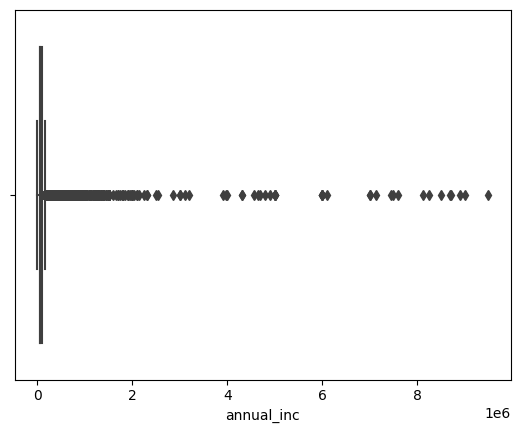

In [ ]:
#Cheking the data distribution of the df_loan_dc data for annual_inc
sns.boxplot(data = df_loan_dc , x ="annual_inc")

## Check Outlier in Loan Amount

<Axes: xlabel='loan_amnt'>

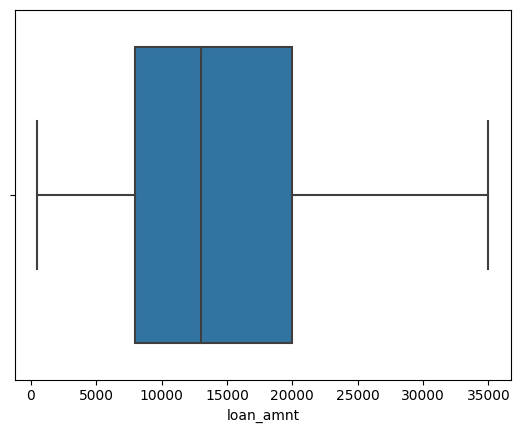

In [ ]:
#Cheking the data distribution of the df_loan_dc data for loan_amnt
sns.boxplot(data = df_loan_dc , x ="loan_amnt")

In [ ]:
# Check the Q1,Q3,IQR,UB & LB
# ainc = annual income
print('Outlier Detection "annual_inc":\n')
ainc_Q1 = df_loan_dc["annual_inc"].quantile(0.25)
print("Q1 =",ainc_Q1)

ainc_Q3 = df_loan_dc["annual_inc"].quantile(0.75)
print("Q3 =",ainc_Q3)

ainc_IQR = ainc_Q3 - ainc_Q1
print("IQR =",ainc_IQR)

ainc_LB = ainc_Q1-1.5*ainc_IQR
print("LB =",ainc_LB)

ainc_UB = ainc_Q3+1.5*ainc_IQR
print("UB =",ainc_UB)

#------------------------------------------
#lamnt = loan amount
print('Outlier Detection "loan_amnt":\n')
lamnt_Q1 = df_loan_dc["loan_amnt"].quantile(0.25)
print("Q1 =",lamnt_Q1)

lamnt_Q3 = df_loan_dc["loan_amnt"].quantile(0.75)
print("Q3 =",lamnt_Q3)

lamnt_IQR = lamnt_Q3 - lamnt_Q1
print("IQR =",lamnt_IQR)

lamnt_LB = lamnt_Q1-1.5*lamnt_IQR
print("LB =",lamnt_LB)

lamnt_UB = lamnt_Q3+1.5*lamnt_IQR
print("UB =",lamnt_UB)

Outlier Detection "annual_inc":

Q1 = 45000.0
Q3 = 90000.0
IQR = 45000.0
LB = -22500.0
UB = 157500.0
Outlier Detection "loan_amnt":

Q1 = 8000.0
Q3 = 20000.0
IQR = 12000.0
LB = -10000.0
UB = 38000.0


In [ ]:
#Removing/Excluding the outlier and assign it on new variable "df_clean"
df_clean_annual_inc = df_loan_dc[~((df_loan_dc["annual_inc"] < ainc_LB) | (df_loan_dc["annual_inc"] > ainc_UB))]
df_clean = df_clean_annual_inc[~((df_clean_annual_inc["loan_amnt"] < lamnt_LB) | (df_clean_annual_inc["loan_amnt"] > lamnt_UB))]
df_clean.shape

(847610, 25)

In [ ]:
#Checking if it is really clean
df_clean[(df_clean["annual_inc"] < ainc_LB)].sort_values("annual_inc",ascending = False)

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,purpose,zip_code,addr_state,application_type,issue_month,issue_year,loan_status_group,loan_amnt_range,annual_inc_range,emp_category



887379 - 847610 = There is 39769 Outlier (4,48%)

And we decide to remove it because it can ruin the K-means segmentation

<Axes: xlabel='annual_inc'>

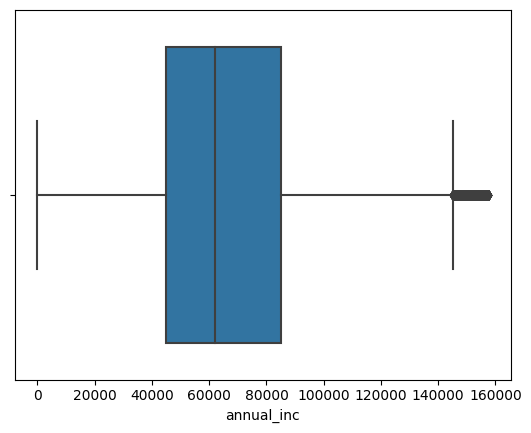

In [ ]:
#Cheking the data distribution of the df_merged data for annual_inc
sns.boxplot(data = df_clean , x ="annual_inc")

It is showing a better distribution, with little noise


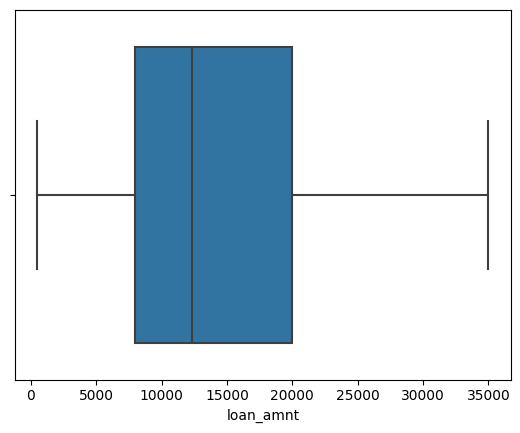

In [ ]:
#Cheking the data distribution of the df_merged data for loan_amnt
loan_amnt_box = sns.boxplot(data = df_clean , x ="loan_amnt")

There are is not a single outlier detected

Clean data : df_clean

#D) EDA

In [ ]:
#Preparing a copy of df_clean for EDA
df_loan_dc_eda = df_clean.copy()
df_loan_dc_eda.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,purpose,zip_code,addr_state,application_type,issue_month,issue_year,loan_status_group,loan_amnt_range,annual_inc_range,emp_category
0,1077501,1296599,5000.0,36 months,10.65,162.87,B,B2,NaN,> 10 years,...,credit_card,860xx,AZ,Individual,12,2011,current,>1000-10000,>10000-100000,Senior
1,1077430,1314167,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,car,309xx,GA,Individual,12,2011,non_current,>1000-10000,>10000-100000,Rookies
2,1077175,1313524,2400.0,36 months,15.96,84.33,C,C5,NaN,> 10 years,...,small_business,606xx,IL,Individual,12,2011,current,>1000-10000,>10000-100000,Senior
3,1076863,1277178,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,> 10 years,...,other,917xx,CA,Individual,12,2011,current,>1000-10000,>10000-100000,Senior
4,1075358,1311748,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,other,972xx,OR,Individual,12,2011,current,>1000-10000,>10000-100000,Rookies


##Descriptive statistics :
* How many users do we have in the data?
* How many users in each category of loan status?
* What is the common purpose for a loan?

### Descriptive information about numeric variable

---



In [ ]:
df_loan_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887329 entries, 0 to 887378
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   887329 non-null  object        
 1   member_id            887329 non-null  object        
 2   loan_amnt            887329 non-null  float64       
 3   term                 887329 non-null  object        
 4   int_rate             887329 non-null  float64       
 5   installment          887329 non-null  float64       
 6   grade                887329 non-null  object        
 7   sub_grade            887329 non-null  object        
 8   emp_title            835874 non-null  object        
 9   emp_length           842505 non-null  object        
 10  home_ownership       887329 non-null  object        
 11  annual_inc           887329 non-null  float64       
 12  verification_status  887329 non-null  object        
 13  issue_d       

In [ ]:
#Descriptive analysis after treating the outlier
pd.set_option('display.float_format', lambda x: '%.3f' % x)

numeric = ['annual_inc','loan_amnt','int_rate', 'installment']

desc_eda = df_loan_dc_eda[numeric].describe()
desc_eda.loc['kurtosis'] = df_loan_dc_eda[numeric].kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = df_loan_dc_eda[numeric].skew() #show Skewness statistic
desc_eda.loc['variance'] = df_loan_dc_eda[numeric].var() #show variance statistic
desc_eda.round(2)

,annual_inc,loan_amnt,int_rate,installment
count,847610.000,847610.000,847610.000,847610.000
mean,67504.700,14341.430,13.290,424.420
std,29918.430,8166.970,4.370,234.600
min,0.000,500.000,5.320,15.670
25%,45000.000,8000.000,9.990,255.980
50%,62000.000,12300.000,12.990,374.870
75%,85000.000,20000.000,16.240,553.080
max,157500.000,35000.000,28.990,1445.460
kurtosis,0.050,-0.130,-0.150,0.810
skewness,0.730,0.710,0.420,0.950


Insight
* Average **annual income** are 75028.170 USD, the median is 65000.000 and the maximum  are 9500000.000
* On average people get **loan amount** 14755.340 USD, the median is 13000.000 USD, the minimum is 500.000 usd and the highest is 35000.000 USD
* The average interest rate is 13.250%, the minimum is 5% and the highest is 28%
* The average installment is 436.720 USD, the median is 382.550 USD, minimum is 15.670 USD and the maximum is 1445.460 USD

###Descriptive information about string variable

---



In [ ]:
objects = [ 'id',
            'loan_status',
            'loan_status_group',
            'purpose',
            'emp_length',
            'emp_category',
            'home_ownership',
            'grade',
            'sub_grade',
            'addr_state',
            'term',
            'verification_status',
            'application_type']

df_loan_dc_eda[objects].describe()

,id,loan_status,loan_status_group,purpose,emp_length,emp_category,home_ownership,grade,sub_grade,addr_state,term,verification_status,application_type
count,847610,847610,847610,847610,803164,803164,847610,847610,847610,847610,847610,847610,847610
unique,847610,8,2,14,11,3,4,7,35,51,2,3,2
top,1077501,Current,current,debt_consolidation,> 10 years,Senior,Mortgage,B,B3,CA,36 months,Source Verified,Individual
freq,1,573107,788211,503508,276994,394808,416098,243325,53712,122297,594039,311033,847110


**Insight**:
* we have 847610 **user**
* Most **loan status** = Current
* Most **loan status_group** = Current
* Most **purpose** is for debt consolidation
* Most **emp_length** = >10 years
* Most **emp_category** = Senior
* Most **home ownership** = Mortgage
* Most user have **grade** = B
* Most user have **grade** = B3
* Most user have **addr_state** = CA
* Most user have **term** = 36 motnhs
* Most **verification status** = Source Verified
* Most **application_type** = Individual



### Descriptive information about date type variable

---



In [ ]:
df_loan_dc_eda['issue_year'].describe()

count   847610.000
mean      2014.015
std          1.264
min       2007.000
25%       2013.000
50%       2014.000
75%       2015.000
max       2015.000
Name: issue_year, dtype: float64

In [ ]:
df_loan_dc_eda['issue_month'].describe()

count   847610.000
mean         7.021
std          3.384
min          1.000
25%          4.000
50%          7.000
75%         10.000
max         12.000
Name: issue_month, dtype: float64

In [ ]:
# Number of member
df_loan_dc_eda['id'].count()

847610

Insight :
* We have 847610 user that taking loan from 2007 to 2014

### Loan Status

In [ ]:
loan_status = df_loan_dc_eda.groupby('loan_status')['id'].count() #Count the id as users and group it by the loan status
loan_status = loan_status.reset_index()                           #Reset the index to make it into a pandas dataframe
loan_status

,loan_status,id
0,Charged Off (180 up days),44778
1,Current,573107
2,Default (121-180 days),1184
3,Fully Paid,201134
4,In Grace Period,5953
5,Issued,8017
6,Late (16-30 days),2264
7,Late (31-120 days),11173


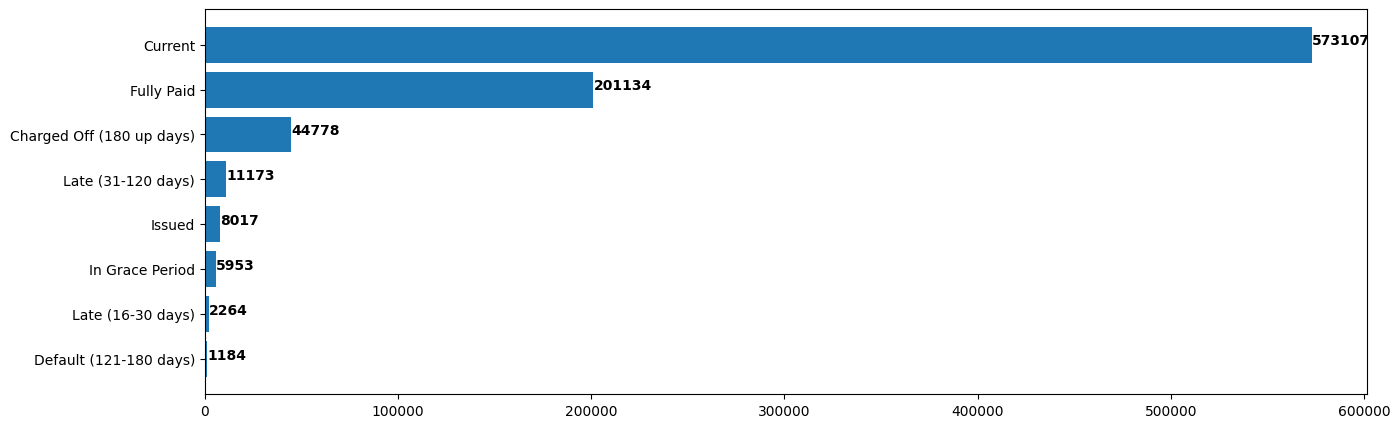

In [ ]:
fig = plt.figure(figsize =(15, 5))    #To create the canvas, figsize is showing size in inches (x,y)

K = loan_status.copy()

K.sort_values('id', ascending=True, inplace=True) #Sort the values descendingly
x = K['loan_status']    #assign the x
y = K['id']             #assign the y

plt.barh(x, y)  #Create the horizontal bar chart

#To show the data labels
for i, v in enumerate(y):                           #enumerate add numeric besides the data, example = (0, ‘value’)
    vmil = round(v)                                 #round the y
    plt.text(v, i, str(vmil), fontweight='bold')    #add text plt.text(x,y,s,fontweight = '')

plt.show()

Here we are using pareto chart

### Loan Status Group

In [ ]:
loan_status_group = df_loan_dc_eda.groupby('loan_status_group')['id'].count() #Count the id as users and group it by the loan status
loan_status_group = loan_status_group.reset_index()                           #Reset the index to make it into a pandas dataframe
loan_status_group

,loan_status_group,id
0,current,788211
1,non_current,59399


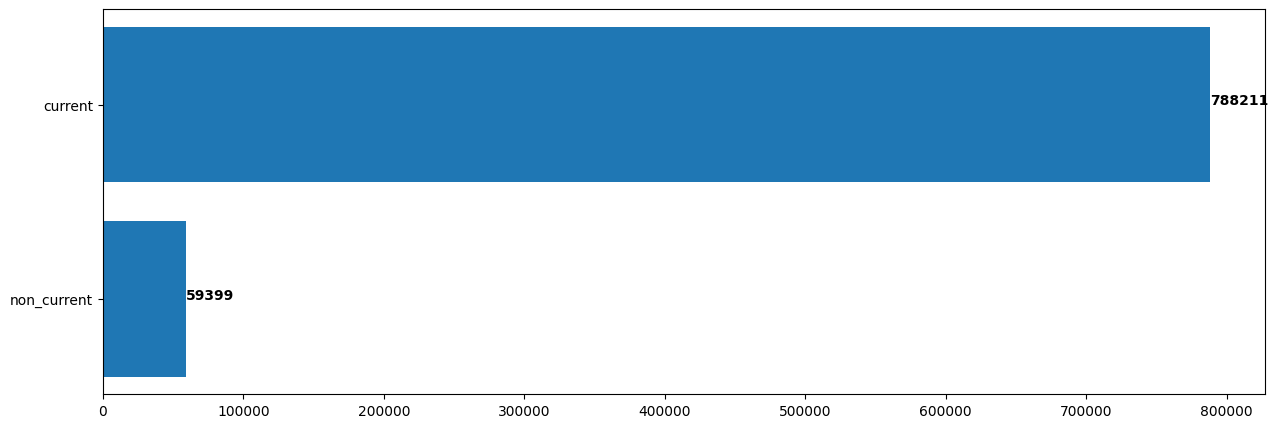

In [ ]:
fig = plt.figure(figsize =(15, 5))    #To create the canvas, figsize is showing size in inches (x,y)

K = loan_status_group.copy()

K.sort_values('id', ascending=True, inplace=True) #Sort the values descendingly
x = K['loan_status_group']    #assign the x
y = K['id']                   #assign the y

plt.barh(x, y)  #Create the horizontal bar chart

#To show the data labels
for i, v in enumerate(y):                           #enumerate add numeric besides the data, example = (0, ‘value’)
    vmil = round(v)                                 #round the y
    plt.text(v, i, str(vmil), fontweight='bold')    #add text plt.text(x,y,s,fontweight = '')

plt.show()

### Purpose

In [ ]:
df_purpose = df_loan_dc_eda.groupby(['purpose'])['id'].count()
df_purpose = df_purpose.reset_index()
df_purpose

,purpose,id
0,car,8566
1,credit_card,196745
2,debt_consolidation,503508
3,educational,414
4,home_improvement,47354
5,house,3452
6,major_purchase,16345
7,medical,8186
8,moving,5192
9,other,41066


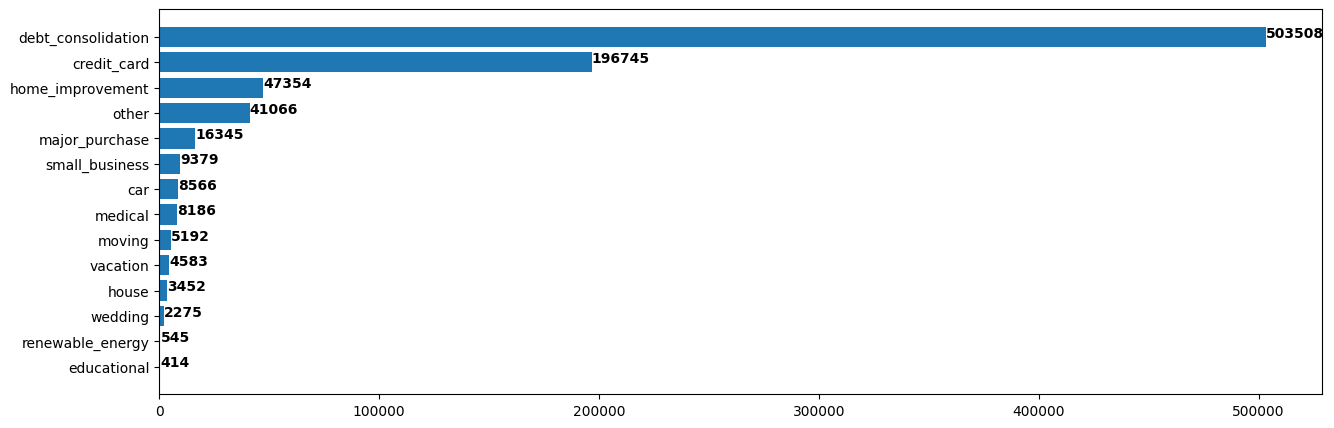

In [ ]:
fig = plt.figure(figsize =(15, 5))    #To create the canvas, figsize is showing size in inches (x,y)

K = df_purpose.copy()

K.sort_values('id', ascending=True, inplace=True) #Sort the values descendingly
x = K['purpose']    #assign the x
y = K['id']         #assign the y

plt.barh(x, y)  #Create the horizontal bar chart

#To show the data labels
for i, v in enumerate(y):                           #enumerate add numeric besides the data, example = (0, ‘value’)
    vmil = round(v)                                 #round the y
    plt.text(v, i, str(vmil), fontweight='bold')    #add text plt.text(x,y,s,fontweight = '')

plt.show()

Here we are using pareto chart

In [ ]:
#We need to create frequency and percentage table
df_purpose.head()

,purpose,id
0,car,8566
1,credit_card,196745
2,debt_consolidation,503508
3,educational,414
4,home_improvement,47354


Since it is not sorted we need to sort it first

In [ ]:
df_purpose = df_purpose.sort_values('id',ascending = False)  #Sort the values for cummulative percentage
df_purpose

,purpose,id
2,debt_consolidation,503508
1,credit_card,196745
4,home_improvement,47354
9,other,41066
6,major_purchase,16345
11,small_business,9379
0,car,8566
7,medical,8186
8,moving,5192
12,vacation,4583


Now we add percentage on the table

In [ ]:
#add new cum_percentage column
df_purpose['cum_percentage'] = np.round(df_purpose['id'].cumsum()/df_purpose['id'].sum() * 100,2)   #add cumulative sum using .cumsum()
df_purpose

,purpose,id,cum_percentage
2,debt_consolidation,503508,59.400
1,credit_card,196745,82.610
4,home_improvement,47354,88.200
9,other,41066,93.050
6,major_purchase,16345,94.980
11,small_business,9379,96.080
0,car,8566,97.090
7,medical,8186,98.060
8,moving,5192,98.670
12,vacation,4583,99.210


Now we create the chart

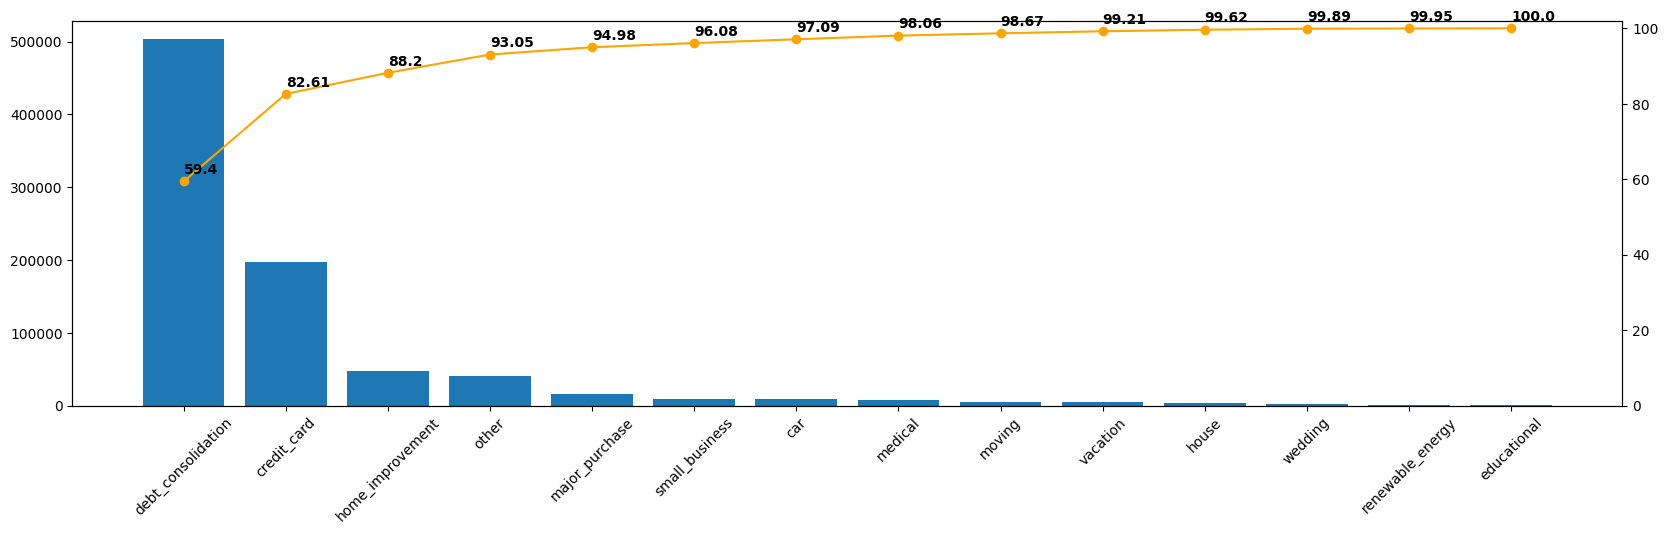

In [ ]:
fig,ax = plt.subplots(figsize=(20, 5))    #To create sub plot

x = df_purpose['purpose']
y_bar = df_purpose['id']
y_line = df_purpose['cum_percentage']

ax.bar(x,y_bar)   #To create the bar chart

plt.xticks(rotation = 45)

ax2 = ax.twinx()     #To create combo chart, create twin axis of y, by sharing x axis
ax2.plot(x,y_line, marker = 'o', color = 'orange')   #To create the line chart
ax2.set_ylim(ymin=0)    #To make the line chart start at 0

#To create the data labels
for i, v in enumerate(y_line):
    vmil = round(v,2)
    plt.text(i, v+2, str(vmil), fontweight='bold')

plt.show()

**Insight :**
* We can see that most user which is aroung 59,40% of all users, using their loan for debt consolidation
* 82.61 percent of total customer getting a loan for debt_consolidation and credit card purposes

### Employee Length

In [ ]:
#Count the user based on the emp_length
df_emp_length = df_loan_dc_eda.groupby(['emp_length'])['id'].count()
df_emp_length = df_emp_length.reset_index()
df_emp_length

,emp_length,id
0,1 year,54655
1,2 years,75149
2,3 years,66805
3,4 years,50085
4,5 years,53123
5,6 years,41060
6,7 years,42635
7,8 years,41986
8,9 years,33193
9,< 1 year,67479


Here we are using vertical bar chart

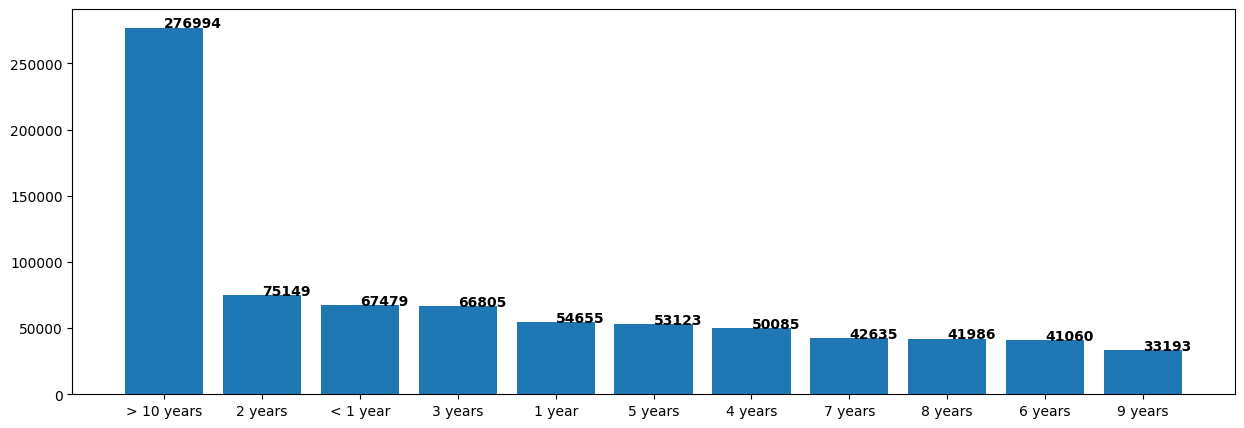

In [ ]:
fig = plt.figure(figsize =(15, 5))

K = df_emp_length.copy()

K.sort_values('id', ascending=False, inplace=True)
x = K['emp_length']
y = K['id']

#Add the data labels
for i, v in enumerate(y):
    vmil = round(v)
    plt.text(i, v, str(vmil), fontweight='bold')

plt.bar(x, y)   #Create the bar chart
plt.show()

### Employee Category

In [ ]:
#Count the user based on the df_emp_category
df_emp_category = df_loan_dc_eda.groupby(['emp_category'])['id'].count()
df_emp_category = df_emp_category.reset_index()
df_emp_category

,emp_category,id
0,Mid-Level,211073
1,Rookies,197283
2,Senior,394808


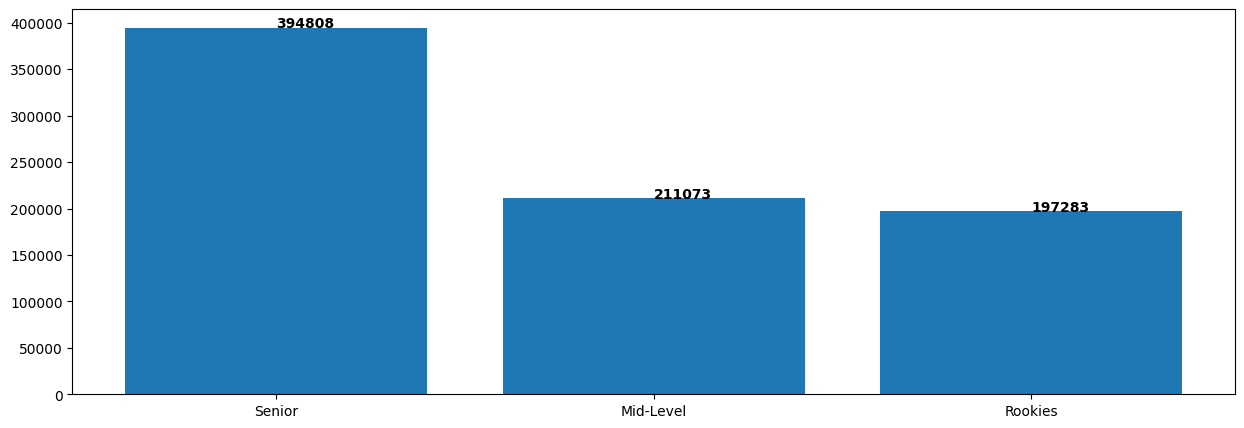

In [ ]:
fig = plt.figure(figsize =(15, 5))

K = df_emp_category.copy()

K.sort_values('id', ascending=False, inplace=True)
x = K['emp_category']
y = K['id']

#Add the data labels
for i, v in enumerate(y):
    vmil = round(v)
    plt.text(i, v, str(vmil), fontweight='bold')

plt.bar(x, y)   #Create the bar chart
plt.show()

In [ ]:
#Count the user based on the 'addr_state'
df_addr_state = df_loan_dc_eda.groupby(['addr_state'])['id'].count()
df_addr_state = df_addr_state.reset_index()
df_addr_state

,addr_state,id
0,AK,2118
1,AL,10910
2,AR,6449
3,AZ,19689
4,CA,122297
5,CO,18032
6,CT,12611
7,DC,2285
8,DE,2422
9,FL,58534


## Finding Pattern:
Visualize the dataset, and find a pattern on time-series data in the dataset
* Is there any trend on issued loans, monthly?
* How about monthly trends on issued loans based on purpose loans in the dataset

#### Trend on monthly issued loan

---

#####Total amount usd loaned

In [ ]:
loan_trend = df_loan_dc_eda[['issue_d','loan_amnt']]    #Choose the variable wee need to make the chart
loan_trend['year_month'] = loan_trend['issue_d'].dt.strftime('%Y/%m')   #Change the issue_d into year,month format to get monthly data

loan_trend = loan_trend.sort_values('issue_d')  #Sort the values by the issue_d, ascending
loan_trend = loan_trend.groupby('year_month').sum() #sum the data and group it by the year_month
loan_trend = loan_trend.reset_index()
loan_trend.head()

<ipython-input-139-88c70bd43676>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_trend['year_month'] = loan_trend['issue_d'].dt.strftime('%Y/%m')   #Change the issue_d into year,month format to get monthly data
<ipython-input-139-88c70bd43676>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan_trend = loan_trend.groupby('year_month').sum() #sum the data and group it by the year_month


,year_month,loan_amnt
0,2007/06,76850.000
1,2007/07,318625.000
2,2007/08,426500.000
3,2007/09,352950.000
4,2007/10,698225.000


###### Line Chart

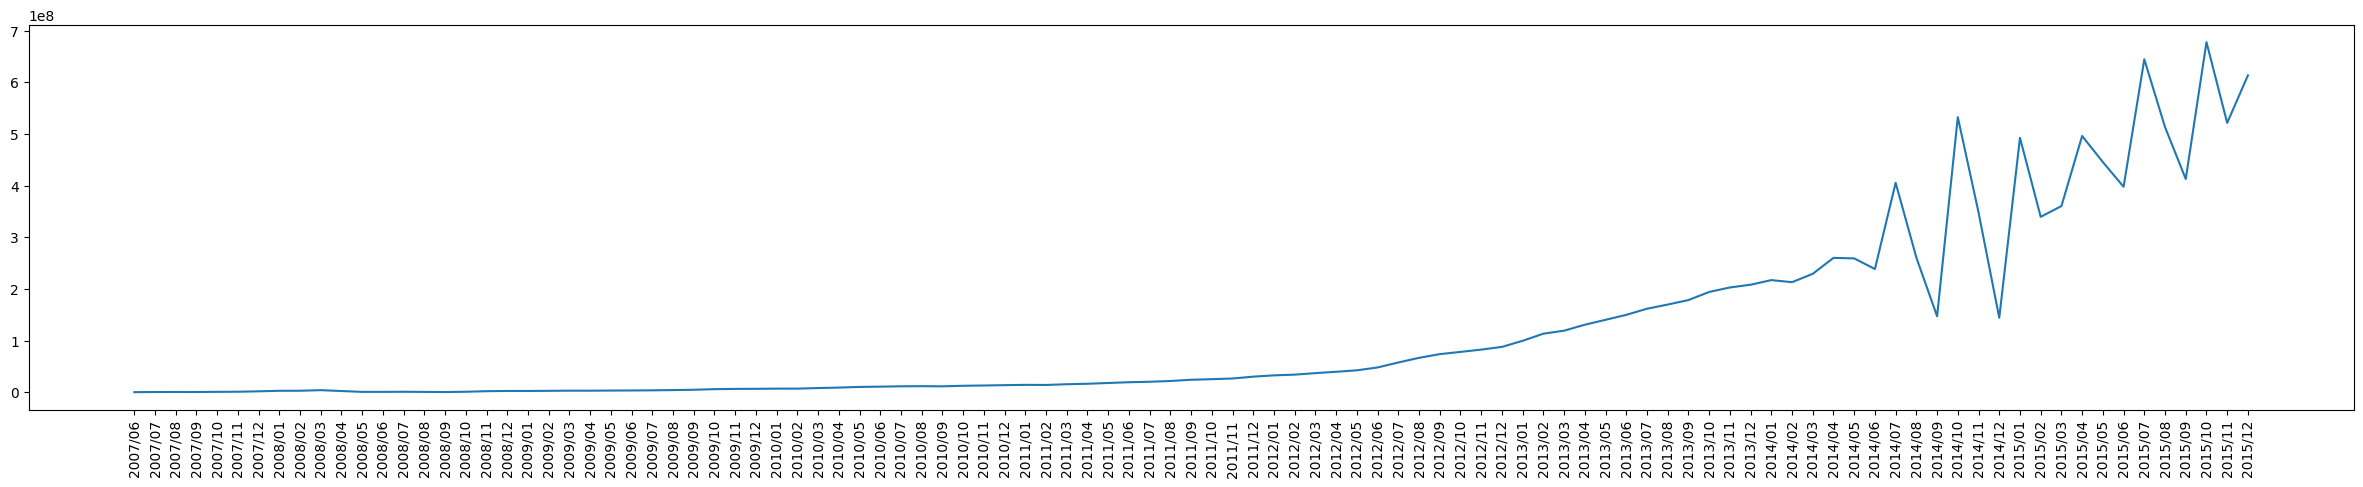

In [ ]:
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(loan_trend['year_month'], loan_trend['loan_amnt'])

plt.show()

##### Total user getting a loan

---

In [ ]:
u_loan_trend = df_loan_dc_eda[['issue_d','id']]    #Choose the variable wee need to make the chart
u_loan_trend['year_month'] = u_loan_trend['issue_d'].dt.strftime('%Y/%m')   #Change the issue month into year,month format to get monthly data

u_loan_trend = u_loan_trend.sort_values('issue_d')  #Sort the values by the issue month, ascending
u_loan_trend = u_loan_trend.groupby('year_month')['id'].count() #sum the data and group it by the year_month
u_loan_trend = u_loan_trend.reset_index()
u_loan_trend.head()

<ipython-input-141-c775b5153210>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u_loan_trend['year_month'] = u_loan_trend['issue_d'].dt.strftime('%Y/%m')   #Change the issue month into year,month format to get monthly data


,year_month,id
0,2007/06,21
1,2007/07,57
2,2007/08,64
3,2007/09,51
4,2007/10,102


###### Line Chart

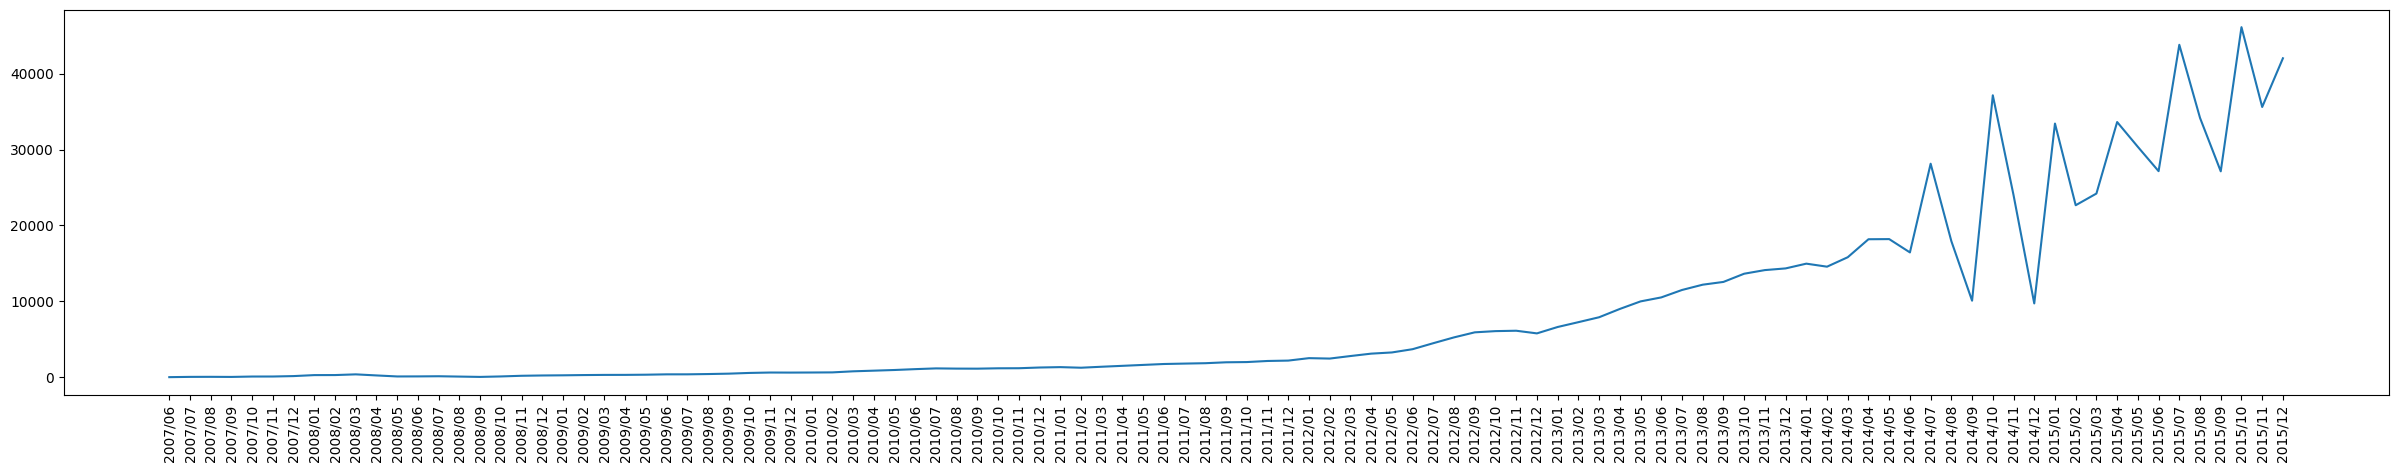

In [ ]:
plt.figure(figsize =(30, 5))
plt.xticks(rotation = 90)
plt.plot(u_loan_trend['year_month'], u_loan_trend['id'])

plt.show()

#####**Insight**
**Amount USD**
* We can see that from 2007 to 2014 the issued loan are overall increasing
* And from 2014/07 the drop and increase are really steep and significat

**Number of Member**
* The trend seems identical if we look at the number of user who get a loan
* so it probably that the amount of loan get loaned are directly caused by the number of user missing and appearing at that time

#### Monthly trends on issued loans based on purpose loans in the dataset

##### Purpose by the amount usd

---

In [ ]:
purpose_trend = df_loan_dc_eda[['purpose','issue_d','loan_amnt']]           #Pick variable that wanted to be analyzed
purpose_trend['issue_d'] = purpose_trend['issue_d'].dt.strftime('%Y/%m')    #Change the format into year/month
purpose_trend.head()

<ipython-input-143-44b6436190a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purpose_trend['issue_d'] = purpose_trend['issue_d'].dt.strftime('%Y/%m')    #Change the format into year/month


,purpose,issue_d,loan_amnt
0,credit_card,2011/12,5000.000
1,car,2011/12,2500.000
2,small_business,2011/12,2400.000
3,other,2011/12,10000.000
4,other,2011/12,3000.000


In [ ]:
#Check the issue month data type
purpose_trend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847610 entries, 0 to 887378
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   purpose    847610 non-null  object 
 1   issue_d    847610 non-null  object 
 2   loan_amnt  847610 non-null  float64
dtypes: float64(1), object(2)
memory usage: 25.9+ MB


In [ ]:
#Change the column order for pivoting
purpose_trend = purpose_trend[['issue_d','purpose','loan_amnt']]
purpose_trend.head(1)

,issue_d,purpose,loan_amnt
0,2011/12,credit_card,5000.000


In [ ]:
#Change the purpose into a column using pivot
purpose_trend_pivot = purpose_trend.pivot_table(index = 'issue_d', columns='purpose', values = 'loan_amnt',aggfunc = 'sum') #Pivot the table and sum if there is a duplicate found
purpose_trend_pivot = purpose_trend_pivot.reset_index()
purpose_trend_pivot.head()

purpose,issue_d,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,2007/06,NaN,NaN,17900.000,NaN,NaN,NaN,NaN,NaN,NaN,58950.000,NaN,NaN,NaN,NaN
1,2007/07,10350.000,104750.000,80075.000,23100.000,11500.000,NaN,NaN,NaN,8500.000,20000.000,NaN,50250.000,10100.000,NaN
2,2007/08,22500.000,155775.000,105300.000,35900.000,18500.000,6000.000,NaN,NaN,12650.000,53750.000,NaN,12125.000,3000.000,1000.000
3,2007/09,4000.000,31475.000,192150.000,14575.000,23950.000,NaN,NaN,6100.000,NaN,46950.000,NaN,33750.000,NaN,NaN
4,2007/10,8200.000,86275.000,279900.000,49150.000,18900.000,9175.000,NaN,14400.000,2225.000,140250.000,NaN,77725.000,4000.000,8025.000


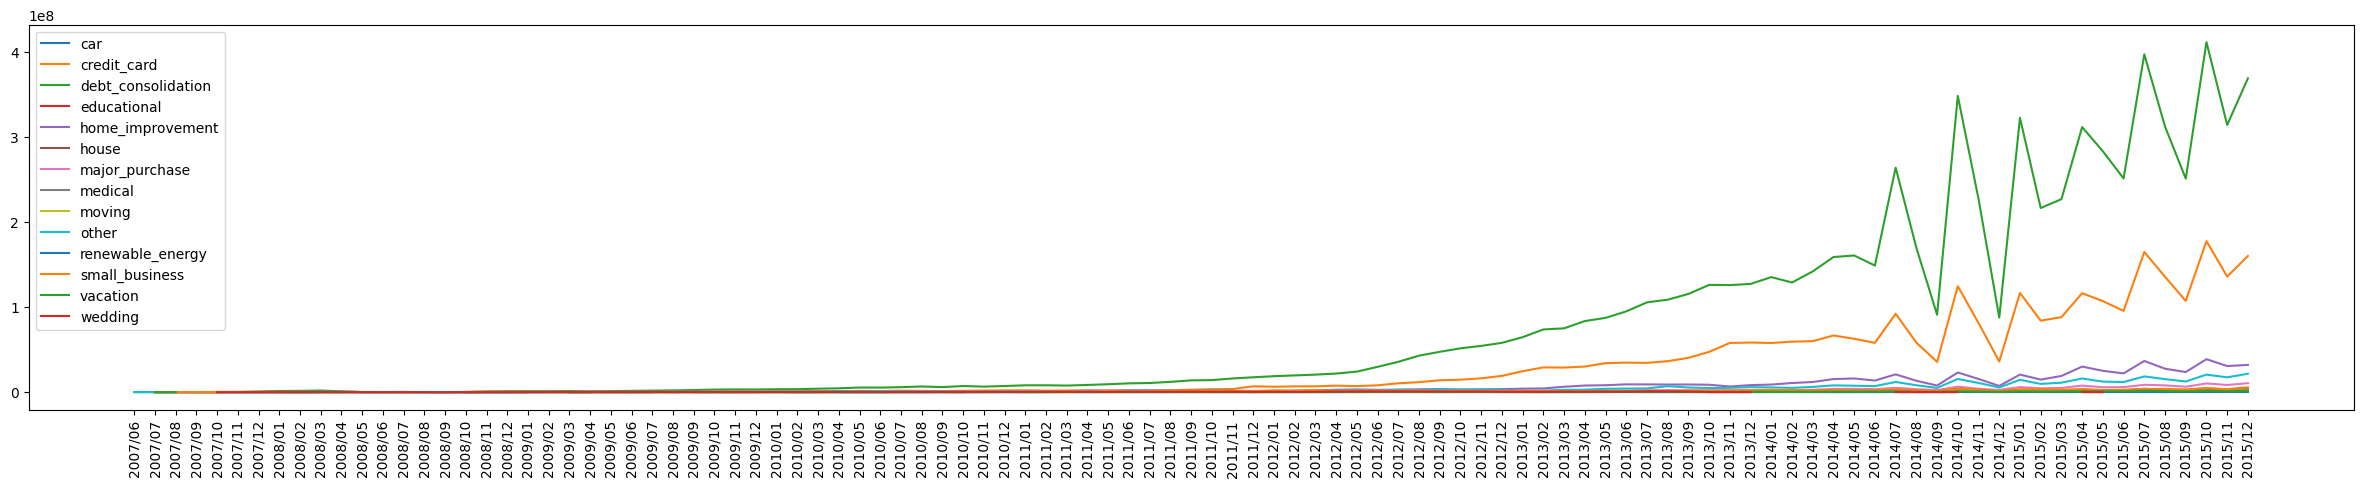

In [ ]:
#Create line chart
plt.figure(figsize =(30, 5))
axis = purpose_trend_pivot.columns.tolist()
#axis.head()

for x in axis[1:]:
  plt.plot(purpose_trend_pivot['issue_d'], purpose_trend_pivot[x])

plt.xticks(rotation = 90)
plt.legend(purpose_trend_pivot.iloc[:,1:],loc = 2)

plt.show()

Recommendation:
* Since the categories are too diverse, and most users purposes are mostly for debt consolidation and credit card, we will narrow the analysis only for that
* And also since the movement are starting to arise from 2012, we also interested in analysing the data from 2012 onwards

In [ ]:
#filter it into more than 12/01
df_purpose_fltr = purpose_trend_pivot[purpose_trend_pivot['issue_d'] >= '2012/01']
df_purpose_fltr.head()

purpose,issue_d,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
55,2012/01,530525.000,6367900.000,18797200.000,NaN,1089225.000,494575.000,697100.000,258500.000,188475.000,1538750.000,30400.000,2063425.000,78550.000,447550.000
56,2012/02,494175.000,6796550.000,19688700.000,NaN,1657125.000,599050.000,556125.000,332275.000,134150.000,1629825.000,34000.000,1667300.000,94850.000,313450.000
57,2012/03,712250.000,6898225.000,20631300.000,NaN,2068000.000,574800.000,763850.000,254850.000,202800.000,1919675.000,29000.000,2254725.000,81975.000,502525.000
58,2012/04,327550.000,7612725.000,21888175.000,NaN,2788175.000,670600.000,1303200.000,450025.000,211850.000,2003400.000,17875.000,1402900.000,135025.000,714425.000
59,2012/05,543475.000,7110025.000,24153200.000,NaN,3213300.000,377150.000,895400.000,503600.000,371200.000,2345075.000,28600.000,1724375.000,232800.000,823150.000


###### Line Chart

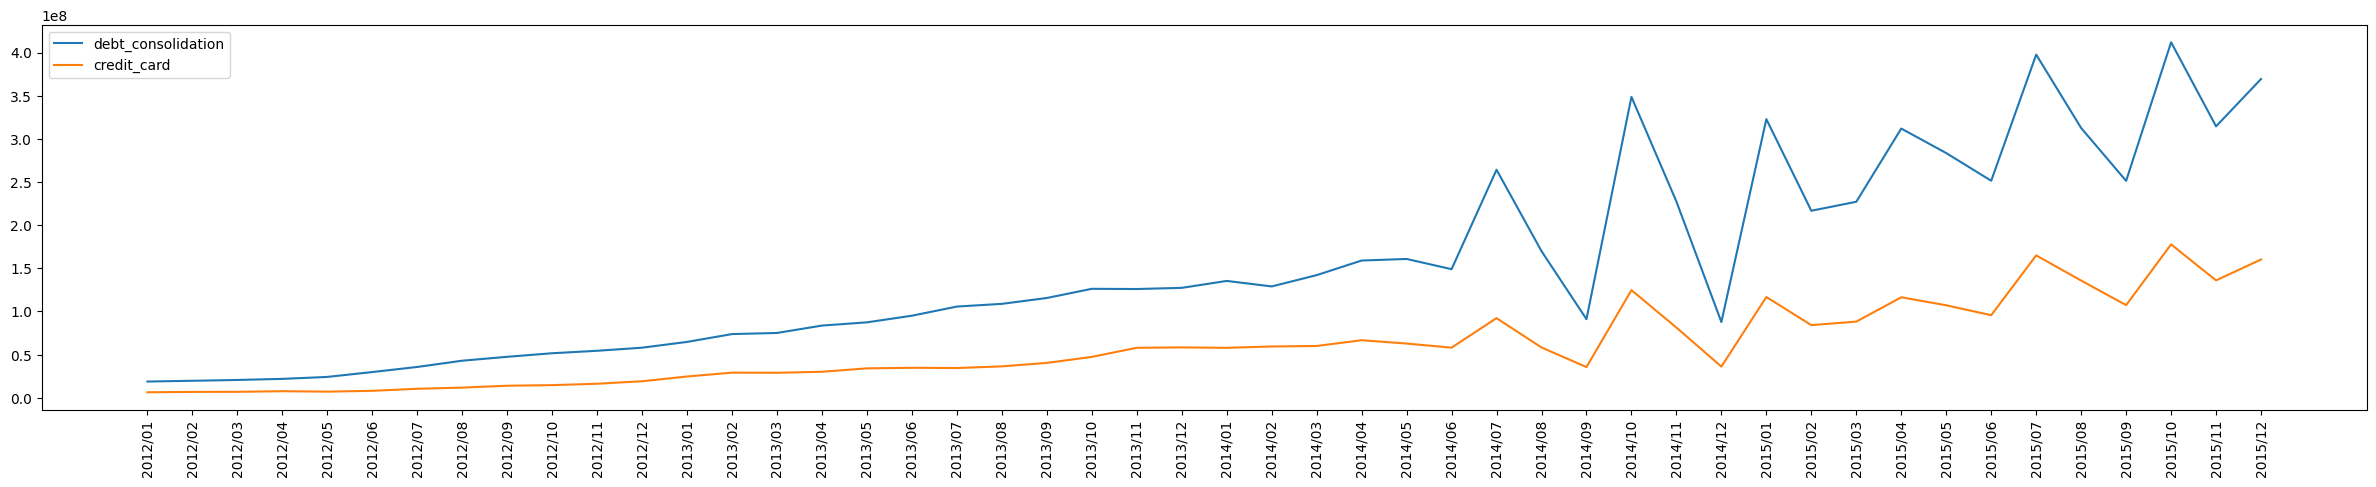

In [ ]:
fig = plt.figure(figsize = (30,5))
axis = df_purpose_fltr[['debt_consolidation','credit_card']]
x = df_purpose_fltr['issue_d']
y = df_purpose_fltr[1:]

for x in axis[1:]:
  plt.plot(df_purpose_fltr['issue_d'], df_purpose_fltr[x])

plt.xticks(rotation = 90)
plt.legend(df_purpose_fltr[['debt_consolidation','credit_card']],loc = 2)

plt.show()

##### Purpose by the user

---

In [ ]:
u_purpose_trend = df_loan_dc_eda[['purpose','issue_d','id']]    #Pick variable that wanted to be analyzed
u_purpose_trend['issue_d'] = u_purpose_trend['issue_d'].dt.strftime('%Y/%m')    #Change the format into year/month
u_purpose_trend.head()

<ipython-input-150-8117587f6f5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u_purpose_trend['issue_d'] = u_purpose_trend['issue_d'].dt.strftime('%Y/%m')    #Change the format into year/month


,purpose,issue_d,id
0,credit_card,2011/12,1077501
1,car,2011/12,1077430
2,small_business,2011/12,1077175
3,other,2011/12,1076863
4,other,2011/12,1075358


In [ ]:
# Check the issue month data type
u_purpose_trend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847610 entries, 0 to 887378
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   purpose  847610 non-null  object
 1   issue_d  847610 non-null  object
 2   id       847610 non-null  object
dtypes: object(3)
memory usage: 25.9+ MB


In [ ]:
# Change the column order for pivoting
u_purpose_trend = u_purpose_trend[['issue_d','purpose','id']]
u_purpose_trend.head(1)

,issue_d,purpose,id
0,2011/12,credit_card,1077501


In [ ]:
#Change the purpose into a column using pivot
u_purpose_trend_pivot = u_purpose_trend.pivot_table(index = 'issue_d', columns='purpose', values = 'id',aggfunc = 'count') #Pivot the table and sum if there is a duplicate found
u_purpose_trend_pivot = u_purpose_trend_pivot.reset_index()
u_purpose_trend_pivot.head()

purpose,issue_d,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,2007/06,NaN,NaN,3.000,NaN,NaN,NaN,NaN,NaN,NaN,18.000,NaN,NaN,NaN,NaN
1,2007/07,2.000,17.000,16.000,6.000,3.000,NaN,NaN,NaN,2.000,5.000,NaN,4.000,2.000,NaN
2,2007/08,3.000,20.000,15.000,5.000,5.000,1.000,NaN,NaN,3.000,8.000,NaN,2.000,1.000,1.000
3,2007/09,1.000,5.000,23.000,4.000,5.000,NaN,NaN,2.000,NaN,8.000,NaN,3.000,NaN,NaN
4,2007/10,2.000,13.000,37.000,8.000,4.000,1.000,NaN,1.000,1.000,24.000,NaN,8.000,1.000,2.000


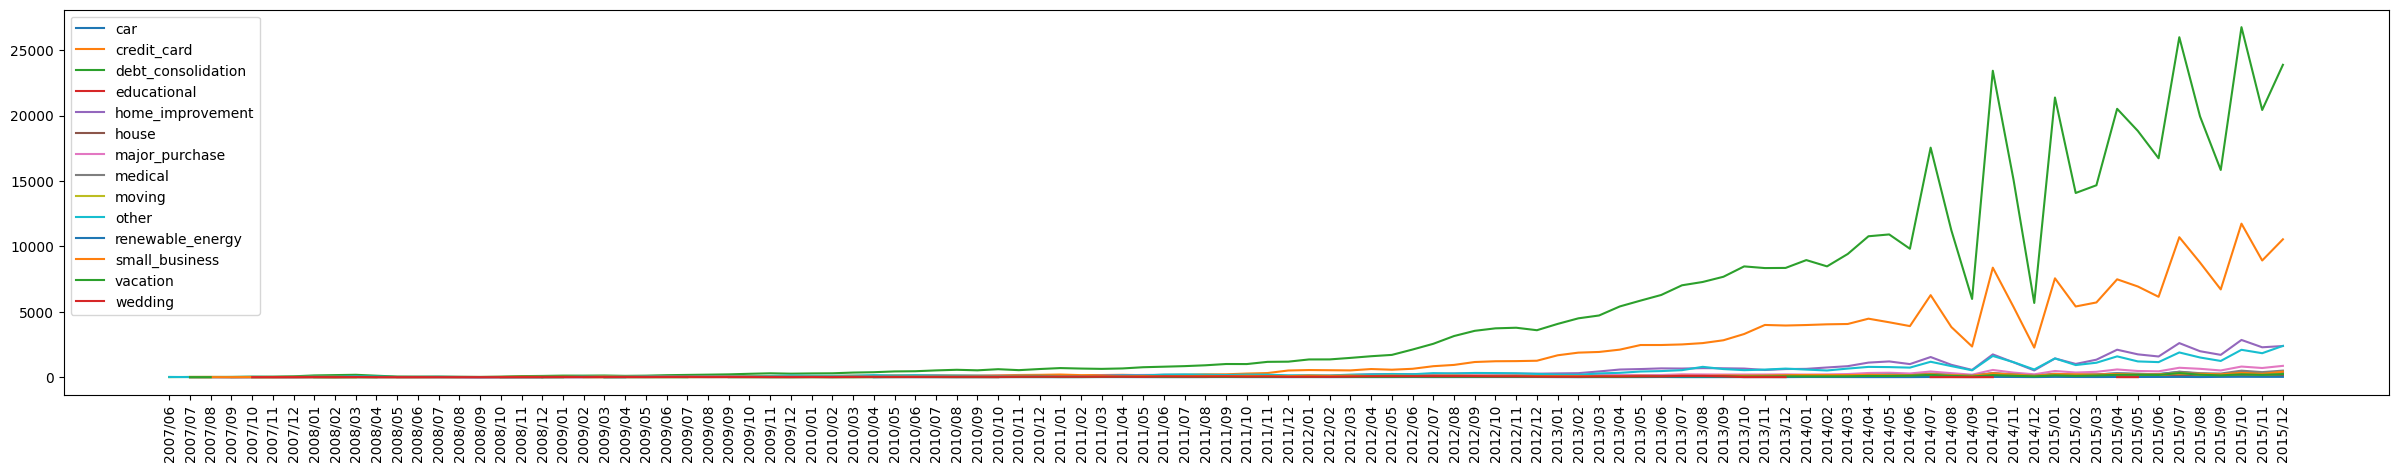

In [ ]:
#Create line chart
plt.figure(figsize =(30, 5))
axis = u_purpose_trend_pivot.columns.tolist()
#axis.head()

for x in axis[1:]:    #
  plt.plot(u_purpose_trend_pivot['issue_d'], u_purpose_trend_pivot[x])

plt.xticks(rotation = 90)
plt.legend(u_purpose_trend_pivot.iloc[:,1:],loc = 2)

plt.show()

Recommendation:
* Since the categories are too diverse, and most users purposes are mostly for debt consolidation and credit card, we will narrow the analysis only for that
* And also since the movement are starting to arise from 2012, we also interested in analysing the data from 2012 onwards

In [ ]:
#filter it into more than 12/01
u_purpose_fltr = u_purpose_trend_pivot[purpose_trend_pivot['issue_d'] >= '2012/01']
u_purpose_fltr.head()

purpose,issue_d,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
55,2012/01,67.000,545.000,1355.000,NaN,85.000,29.000,71.000,29.000,18.000,150.000,6.000,122.000,14.000,33.000
56,2012/02,61.000,531.000,1358.000,NaN,108.000,29.000,54.000,34.000,15.000,131.000,2.000,103.000,16.000,26.000
57,2012/03,102.000,517.000,1474.000,NaN,163.000,31.000,87.000,24.000,22.000,192.000,5.000,123.000,14.000,47.000
58,2012/04,52.000,621.000,1601.000,NaN,223.000,38.000,114.000,48.000,30.000,208.000,3.000,90.000,22.000,67.000
59,2012/05,74.000,570.000,1703.000,NaN,242.000,27.000,110.000,54.000,32.000,240.000,4.000,117.000,29.000,72.000


###### Line Chart

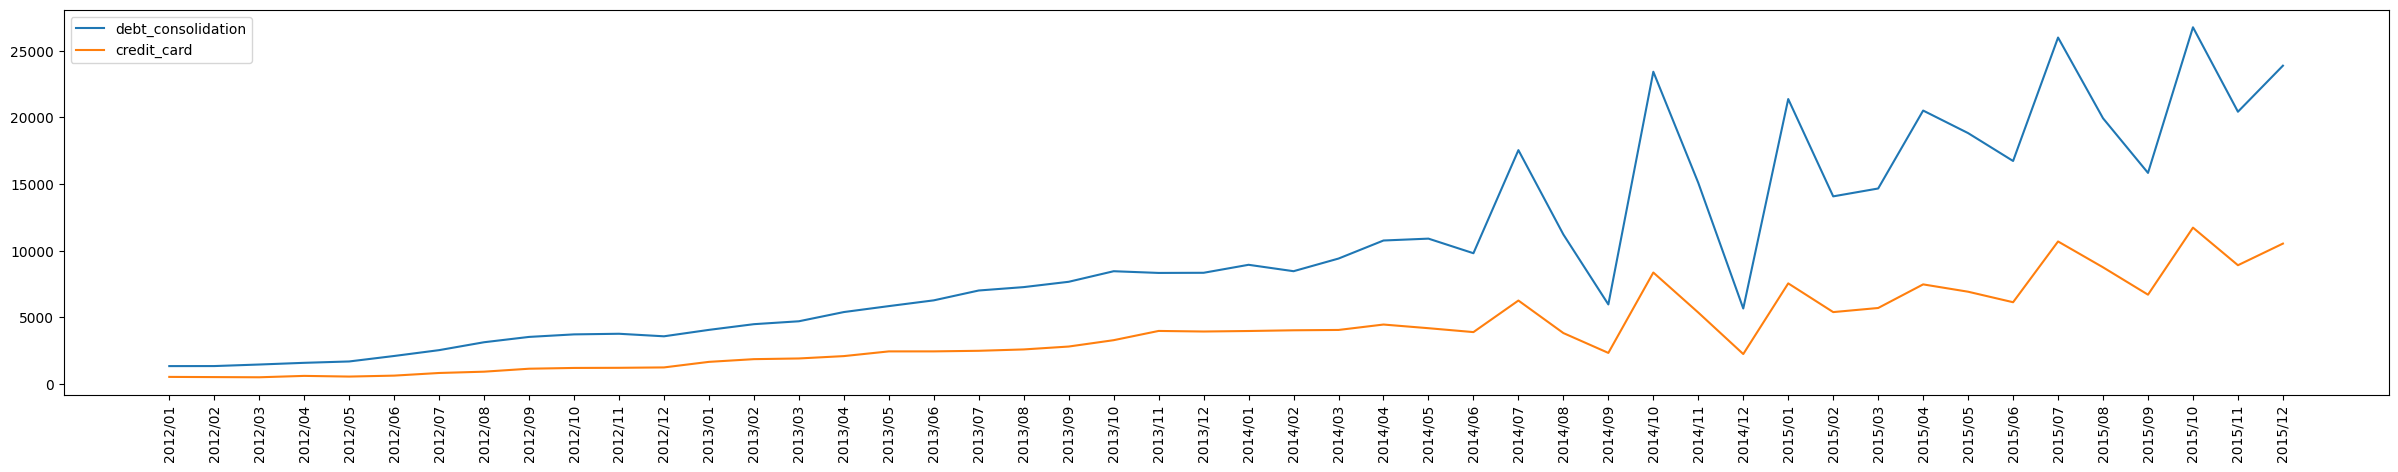

In [ ]:
fig = plt.figure(figsize = (30,5))
axis = u_purpose_fltr[['debt_consolidation','credit_card']]
x = u_purpose_fltr['issue_d']
y = u_purpose_fltr[1:]

for x in axis[1:]:
  plt.plot(u_purpose_fltr['issue_d'], u_purpose_fltr[x])

plt.xticks(rotation = 90)
plt.legend(u_purpose_fltr[['debt_consolidation','credit_card']],loc = 2)

plt.show()

#####**Insight**
* By looking at the chart either from the amount of money loaned and the user showing similar trend
* For the debt_consolidation it shows suddent drop and increase of around 150 person every time the changes happens around 2014/06
* For the credit_card, the swing also can be seen but does not as appearing






#H. Segmentation

## Data Preparation

In [ ]:
# Make a copy of the clean data for segmentation
df_loan_dc_segmentation = df_loan_dc.copy()
df_loan_dc_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887329 entries, 0 to 887378
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   887329 non-null  object        
 1   member_id            887329 non-null  object        
 2   loan_amnt            887329 non-null  float64       
 3   term                 887329 non-null  object        
 4   int_rate             887329 non-null  float64       
 5   installment          887329 non-null  float64       
 6   grade                887329 non-null  object        
 7   sub_grade            887329 non-null  object        
 8   emp_title            835874 non-null  object        
 9   emp_length           842505 non-null  object        
 10  home_ownership       887329 non-null  object        
 11  annual_inc           887329 non-null  float64       
 12  verification_status  887329 non-null  object        
 13  issue_d       

Here we want to create our cluster using these feature :
* Annual Income
* Loan Amount

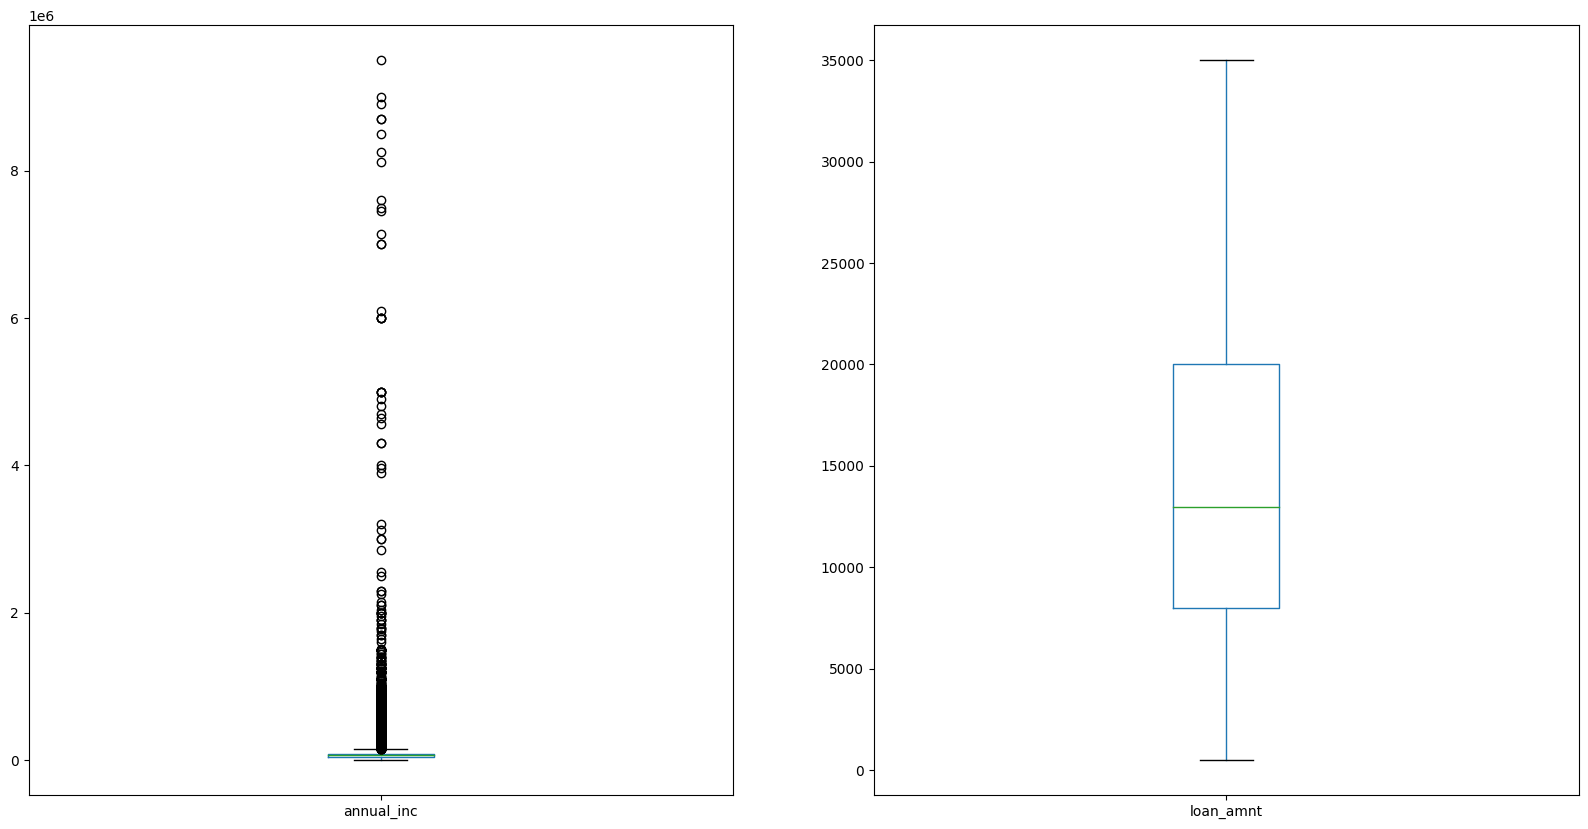

In [ ]:
# filter numeric column
feature = ['annual_inc', 'loan_amnt']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

# for 0 (i) , Income (el)
for i,el in enumerate(feature):
    a = df_loan_dc_segmentation.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

####Preparing annual income and loan amount

In [ ]:
df_loan_dc_segmentation_feature = df_loan_dc_segmentation[['id','annual_inc', 'loan_amnt']]
df_loan_dc_segmentation_feature

,id,annual_inc,loan_amnt
0,1077501,24000.000,5000.000
1,1077430,30000.000,2500.000
2,1077175,12252.000,2400.000
3,1076863,49200.000,10000.000
4,1075358,80000.000,3000.000
...,...,...,...
887374,36371250,31000.000,10000.000
887375,36441262,79000.000,24000.000
887376,36271333,35000.000,13000.000
887377,36490806,64400.000,12000.000


In [ ]:
df_loan_dc_segmentation_feature[df_loan_dc_segmentation_feature.columns[1]].value_counts()

60000.000     34280
50000.000     30573
65000.000     25497
70000.000     24121
40000.000     23942
              ...  
63790.000         1
484000.000        1
44456.000         1
60468.000         1
63078.000         1
Name: annual_inc, Length: 49384, dtype: int64

In [ ]:
df_annual_inc = df_loan_dc_segmentation_feature.groupby(['annual_inc'])['id'].count()
df_annual_inc = df_annual_inc.reset_index()
df_annual_inc

,annual_inc,id
0,0.000,2
1,1200.000,1
2,1770.000,1
3,1896.000,1
4,2000.000,1
...,...,...
49379,8700000.000,1
49380,8706582.000,1
49381,8900060.000,1
49382,9000000.000,1


## Check Data Distribution

### No Scale

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

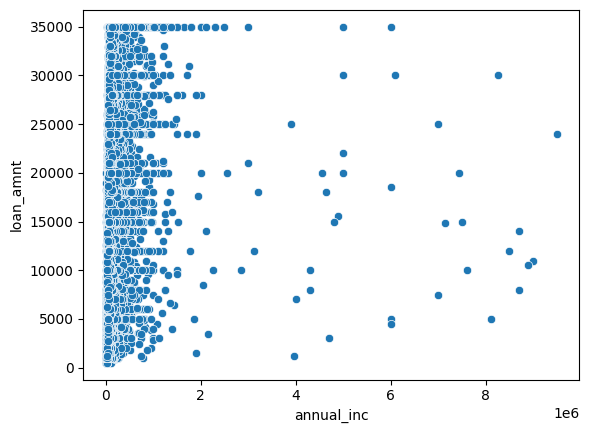

In [ ]:
sns.scatterplot(data = df_loan_dc_segmentation_feature, x='annual_inc', y='loan_amnt')

### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Define Standard Scale dataset
ss_scale_df = df_loan_dc_segmentation_feature.copy()
column = ['annual_inc','loan_amnt']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

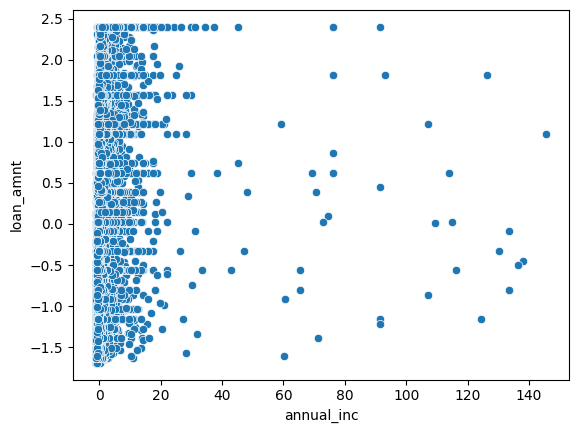

In [ ]:
sns.scatterplot (data = ss_scale_df, x='annual_inc', y='loan_amnt')

In [ ]:
ss_scale_df[['annual_inc', 'loan_amnt']].head()

,annual_inc,loan_amnt
0,-0.789,-1.156
1,-0.696,-1.453
2,-0.970,-1.465
3,-0.399,-0.564
4,0.077,-1.394


### Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
# Define Robust Scale dataset
rs_scale_df = df_loan_dc_segmentation_feature.copy()
column = df_loan_dc_segmentation_feature.columns.to_list()

# Using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[['annual_inc', 'loan_amnt']] = rs_scaler.fit_transform(rs_scale_df[['annual_inc', 'loan_amnt']])

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

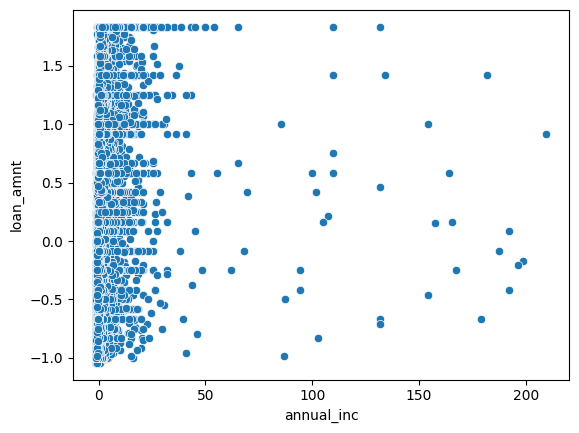

In [ ]:
sns.scatterplot (data = rs_scale_df, x='annual_inc', y='loan_amnt')

### MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Define Minmax Scale dataset
mm_scale_df = df_loan_dc_segmentation_feature.copy()
column = df_loan_dc_segmentation_feature.columns.to_list()

# Using Minmax Scaler
mm_scaler = MinMaxScaler()
mm_scale_df[['annual_inc', 'loan_amnt']] = mm_scaler.fit_transform(mm_scale_df[['annual_inc', 'loan_amnt']])

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

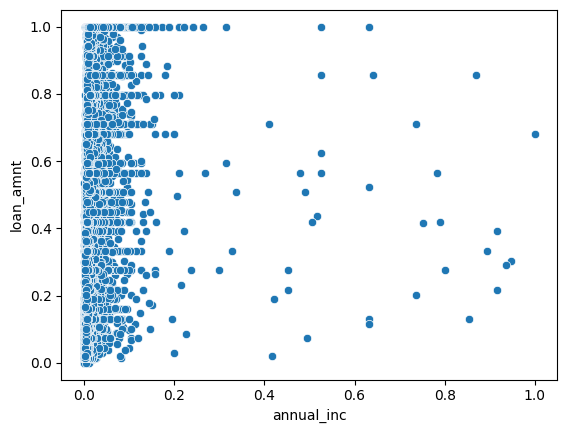

In [ ]:
sns.scatterplot (data = mm_scale_df, x='annual_inc', y='loan_amnt')

## Cluster

### Elbow Method

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

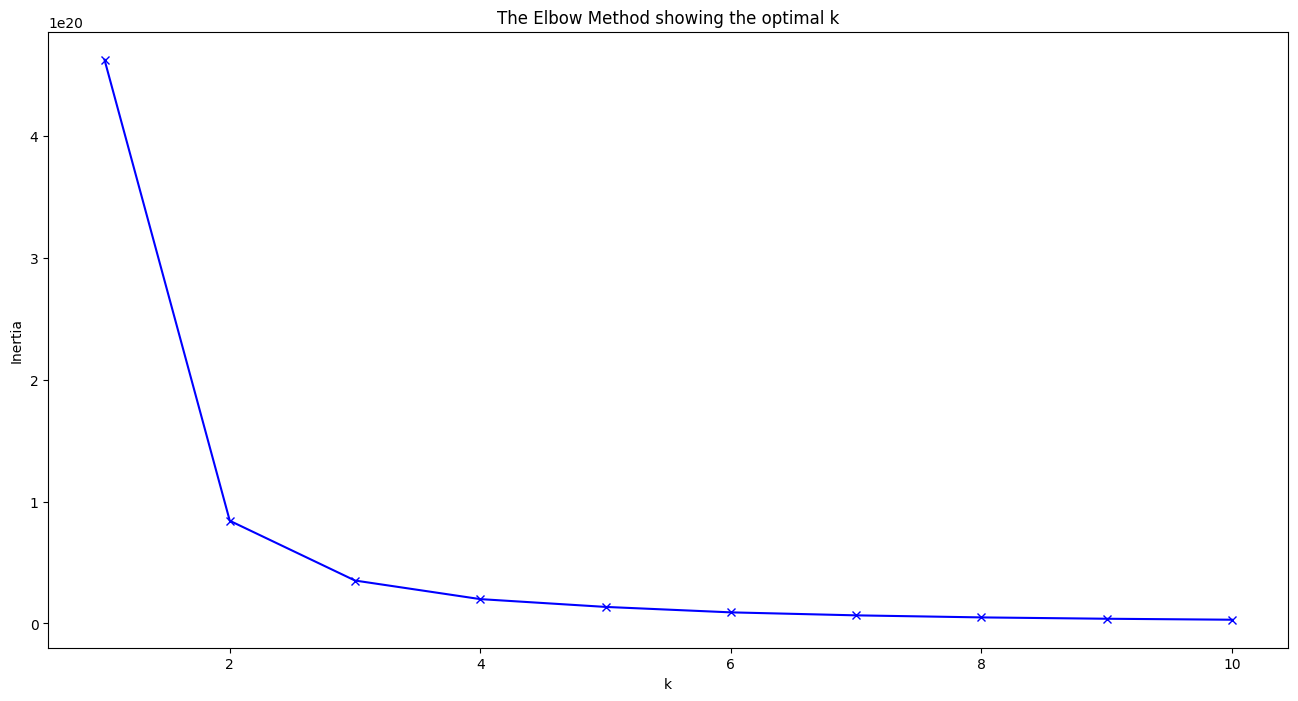

[4.623547073050115e+20, 8.421514738676859e+19, 3.5186947569268883e+19, 1.9946759883366633e+19, 1.3550905347372966e+19, 9.086196954783949e+18, 6.629504102506301e+18, 4.949889838563852e+18, 3.845568282789013e+18, 3.044464538169839e+18]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(ss_scale_df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

### Silhouette Analysis

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhoutte_analysis(ss_scale_df[['annual_inc', 'loan_amnt']],list(range(2,5)))

## Segmentation

With SS Scaler

Cluster 4

In [ ]:
# Make Cluster
Cluster_4 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=4, random_state = 100)
cluster_model.fit_predict(Cluster_4[['annual_inc', 'loan_amnt']])
Cluster_4['cluster'] = cluster_model.labels_
Cluster_4.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,id,annual_inc,loan_amnt,cluster
0,1077501,-0.789,-1.156,1
1,1077430,-0.696,-1.453,1
2,1077175,-0.970,-1.465,1
3,1076863,-0.399,-0.564,1
4,1075358,0.077,-1.394,1


<Axes: xlabel='cluster', ylabel='annual_inc'>

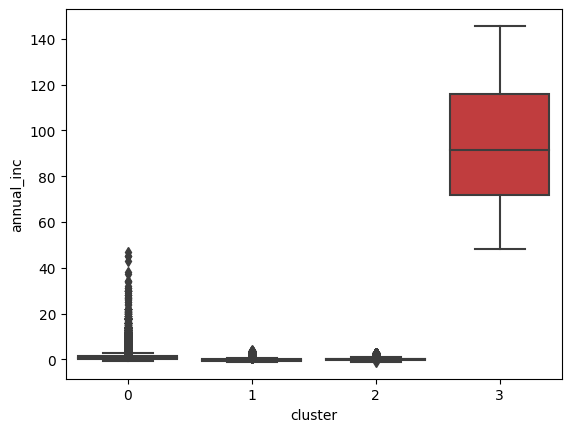

In [ ]:
# Number of Transaction
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='annual_inc')

<Axes: xlabel='cluster', ylabel='loan_amnt'>

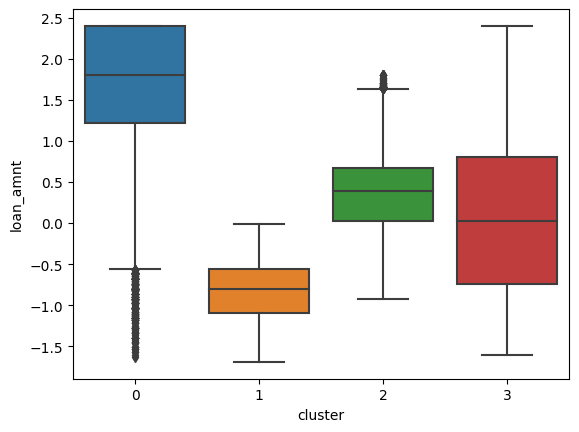

In [ ]:
# Number of Transaction
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='loan_amnt')

In [ ]:
# Make cluster
Cluster_3 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=3)
cluster_model.fit_predict(Cluster_3[['annual_inc', 'loan_amnt']])
Cluster_3['cluster'] = cluster_model.labels_
Cluster_3.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,id,annual_inc,loan_amnt,cluster
0,1077501,-0.789,-1.156,0
1,1077430,-0.696,-1.453,0
2,1077175,-0.970,-1.465,0
3,1076863,-0.399,-0.564,0
4,1075358,0.077,-1.394,0


<Axes: xlabel='cluster', ylabel='annual_inc'>

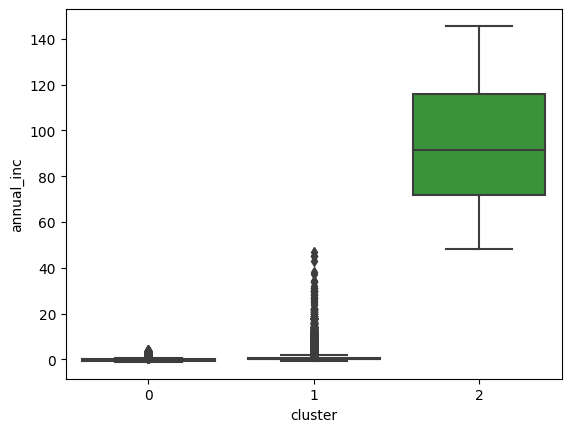

In [ ]:
# Number of Transaction
sns.boxplot (data = Cluster_3 , x ='cluster' , y ='annual_inc')

<Axes: xlabel='cluster', ylabel='loan_amnt'>

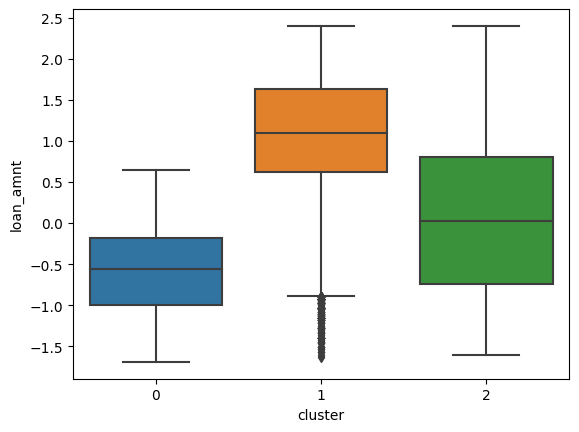

In [ ]:
# Number of Transaction
sns.boxplot (data =Cluster_3 , x ='cluster' , y ='loan_amnt')

## Merge cluster results with dataset

In [ ]:
df_segmented = Cluster_4.merge(df_loan_dc_segmentation,how= 'inner', on = 'id')
df_segmented

,id,annual_inc_x,loan_amnt_x,cluster,member_id,loan_amnt_y,term,int_rate,installment,grade,...,purpose,zip_code,addr_state,application_type,issue_month,issue_year,loan_status_group,loan_amnt_range,annual_inc_range,emp_category
0,1077501,-0.789,-1.156,1,1296599,5000.000,36 months,10.650,162.870,B,...,credit_card,860xx,AZ,Individual,12,2011,current,>1000-10000,>10000-100000,Senior
1,1077430,-0.696,-1.453,1,1314167,2500.000,60 months,15.270,59.830,C,...,car,309xx,GA,Individual,12,2011,non_current,>1000-10000,>10000-100000,Rookies
2,1077175,-0.970,-1.465,1,1313524,2400.000,36 months,15.960,84.330,C,...,small_business,606xx,IL,Individual,12,2011,current,>1000-10000,>10000-100000,Senior
3,1076863,-0.399,-0.564,1,1277178,10000.000,36 months,13.490,339.310,C,...,other,917xx,CA,Individual,12,2011,current,>1000-10000,>10000-100000,Senior
4,1075358,0.077,-1.394,1,1311748,3000.000,60 months,12.690,67.790,B,...,other,972xx,OR,Individual,12,2011,current,>1000-10000,>10000-100000,Rookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887324,36371250,-0.681,-0.564,1,39102635,10000.000,36 months,11.990,332.100,B,...,debt_consolidation,905xx,CA,Individual,1,2015,current,>1000-10000,>10000-100000,Senior
887325,36441262,0.061,1.096,2,39152692,24000.000,36 months,11.990,797.030,B,...,home_improvement,072xx,NJ,Individual,1,2015,current,>20000-30000,>10000-100000,Senior
887326,36271333,-0.619,-0.208,1,38982739,13000.000,60 months,15.990,316.070,D,...,debt_consolidation,378xx,TN,Individual,1,2015,current,>10000-20000,>10000-100000,Mid-Level
887327,36490806,-0.164,-0.327,1,39222577,12000.000,60 months,19.990,317.860,E,...,debt_consolidation,010xx,MA,Individual,1,2015,current,>10000-20000,>10000-100000,Rookies


In [ ]:
df_segmented['cluster']

0         1
1         1
2         1
3         1
4         1
         ..
887324    1
887325    2
887326    1
887327    1
887328    2
Name: cluster, Length: 887329, dtype: int32

## Visualize Cluster

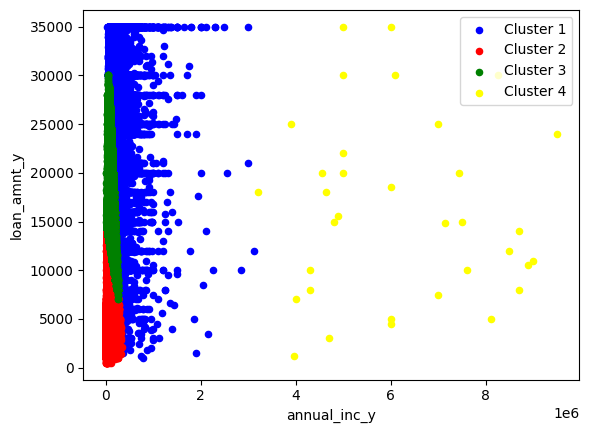

In [ ]:
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(x='annual_inc_y', y='loan_amnt_y', c='blue', label='Cluster 1')
cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(x='annual_inc_y', y='loan_amnt_y', c='red', label='Cluster 2', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(x='annual_inc_y', y='loan_amnt_y', c='green', label='Cluster 3', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 3].plot.scatter(x='annual_inc_y', y='loan_amnt_y', c='yellow', label='Cluster 4', ax = cluster_scatter)

For no we call our clusters as is, then we will create an interesting name for naming the cluster

### Descriptive Statistic

In [ ]:
df_segmented.groupby('cluster',as_index = False)[['annual_inc_y','loan_amnt_y']].agg(['count','mean','min','max','median']).T


cluster                       0          1          2           3
annual_inc_y count   126645.000 442913.000 317737.000      34.000
             mean    140782.582  55824.320  74933.704 6198122.412
             min      29000.000      0.000      0.000 3200000.000
             max    3120000.000 336000.000 265000.000 9500000.000
             median  120000.000  50000.000  70000.000 6000000.000
loan_amnt_y  count   126645.000 442913.000 317737.000      34.000
             mean     29256.567   8003.766  18386.655   16108.088
             min       1000.000    500.000   7000.000    1225.000
             max      35000.000  14675.000  30000.000   35000.000
             median   30000.000   8000.000  18000.000   15000.000

Cluster Interpretation

To Check what can be analyzed

In [ ]:
df_segmented.columns

Index(['id', 'annual_inc_x', 'loan_amnt_x', 'cluster', 'member_id',
       'loan_amnt_y', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc_y',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'application_type', 'issue_month', 'issue_year',
       'loan_status_group', 'loan_amnt_range', 'annual_inc_range',
       'emp_category'],
      dtype='object')

In [ ]:
pd.set_option('display.max_columns',None)
df_segmented.head(5)

,id,annual_inc_x,loan_amnt_x,cluster,member_id,loan_amnt_y,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc_y,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,application_type,issue_month,issue_year,loan_status_group,loan_amnt_range,annual_inc_range,emp_category
0,1077501,-0.789,-1.156,1,1296599,5000.000,36 months,10.650,162.870,B,B2,NaN,> 10 years,Rent,24000.000,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,Individual,12,2011,current,>1000-10000,>10000-100000,Senior
1,1077430,-0.696,-1.453,1,1314167,2500.000,60 months,15.270,59.830,C,C4,Ryder,< 1 year,Rent,30000.000,Source Verified,2011-12-01,Charged Off (180 up days),car,309xx,GA,Individual,12,2011,non_current,>1000-10000,>10000-100000,Rookies
2,1077175,-0.970,-1.465,1,1313524,2400.000,36 months,15.960,84.330,C,C5,NaN,> 10 years,Rent,12252.000,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,Individual,12,2011,current,>1000-10000,>10000-100000,Senior
3,1076863,-0.399,-0.564,1,1277178,10000.000,36 months,13.490,339.310,C,C1,AIR RESOURCES BOARD,> 10 years,Rent,49200.000,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,Individual,12,2011,current,>1000-10000,>10000-100000,Senior
4,1075358,0.077,-1.394,1,1311748,3000.000,60 months,12.690,67.790,B,B5,University Medical Group,1 year,Rent,80000.000,Source Verified,2011-12-01,Current,other,972xx,OR,Individual,12,2011,current,>1000-10000,>10000-100000,Rookies


#### Annual Income

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['annual_inc_y'].mean()

,cluster,annual_inc_y
0,0,140782.582
1,1,55824.320
2,2,74933.704
3,3,6198122.412


Insight :
* 0 = Average annual income = 140783
* 1 = Average annual income = 55824 (Lowest)
* 2 = Average annual income = 74934
* 3 = Average annual income = 6198122 (Highest)

#### Loan Amount

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['loan_amnt_y'].mean()

,cluster,loan_amnt_y
0,0,29256.567
1,1,8003.766
2,2,18386.655
3,3,16108.088


Insight :
* 0 = average loam amnt = 29257 (Highest)
* 1 = average loan amnt = 8003 (Lowest)
* 2 = average loan amnt = 18387
* 3 = average loan amnt = 16108

#### Loan Status

In [ ]:
df_segmented.groupby(['cluster','loan_status'], as_index = False)['id'].count()

,cluster,loan_status,id
0,0,Charged Off (180 up days),5429
1,0,Current,93130
2,0,Default (121-180 days),171
3,0,Fully Paid,23282
4,0,In Grace Period,1031
5,0,Issued,1446
6,0,Late (16-30 days),389
7,0,Late (31-120 days),1767
8,1,Charged Off (180 up days),23883
9,1,Current,285358


Insight :
* 0 = Fully Paid = 93130 = 73,54%
* 1 = Current = 285358 = 64,43%
* 2 = Current = 223265 = 70,27%
* 3 = Current = 24 = 70,59%

#### Installment

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['installment'].mean()

,cluster,installment
0,0,839.391
1,1,254.488
2,2,530.235
3,3,462.466


Insight :
* Average installment order from highest = 0,2,3,1

#### Term

In [ ]:
df_segmented.groupby(['cluster','term'], as_index = False)['id'].count()

,cluster,term,id
0,0,36 months,62328
1,0,60 months,64317
2,1,36 months,387367
3,1,60 months,55546
4,2,36 months,171362
5,2,60 months,146375
6,3,36 months,25
7,3,60 months,9


Insight :
* 0 = most is 60 months by 87%
* 1 = most is 36 months by 50%
* 2 = most is 36 months by 84%
* 3 = most is 36 months by 51%

#### Interest Rate

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['int_rate'].mean()

,cluster,int_rate
0,0,14.009
1,1,12.834
2,2,13.519
3,3,10.758


Insight :
* 0 = average = 14,01%
* 1 = average = 12,83%
* 2 = average = 13,52%
* 3 = average = 10,76%

#### Employee Category

In [ ]:
df_segmented.groupby(['cluster','emp_category'], as_index = False)['id'].count()

,cluster,emp_category,id
0,0,Mid-Level,28941
1,0,Rookies,25903
2,0,Senior,69273
3,1,Mid-Level,116064
4,1,Rookies,113615
5,1,Senior,183477
6,2,Mid-Level,76189
7,2,Rookies,67036
8,2,Senior,161973
9,3,Mid-Level,5


Insight :
* 0 = Senior, Mid-Level, Rookies
* 1 = Senior, Rookies, Mid-Level
* 2 = Senior, Mid-Level, Rookies
* 3 = Senior, Mid-Level, Rookies

#### Home Ownership

In [ ]:
df_segmented.groupby(['cluster','home_ownership'], as_index = False)['id'].count()

,cluster,home_ownership,id
0,0,Mortgage,85992
1,0,Other,12
2,0,Own,11059
3,0,Rent,29582
4,1,Mortgage,182074
5,1,Other,126
6,1,Own,46565
7,1,Rent,214148
8,2,Mortgage,175468
9,2,Other,47


Insight :
* 0 = Mortagage = 85992
* 1 = Rent = 214148
* 2 = Mortagage = 175468
* 3 = Mortagage = 23

#### Purpose

In [ ]:
df_segmented.groupby(['cluster','purpose'], as_index = False)['id'].count()

,cluster,purpose,id
0,0,car,364
1,0,credit_card,31550
2,0,debt_consolidation,77372
3,0,educational,7
4,0,home_improvement,8893
5,0,house,602
6,0,major_purchase,1888
7,0,medical,437
8,0,moving,245
9,0,other,2930


Insight :
* 0 = debt_consolidation = 77372
* 1 = debt_consolidation = 203333
* 2 = debt_consolidation = 203333
* 3 = debt_consolidation = 17

#### Grade

In [ ]:
df_segmented.groupby(['cluster','grade'], as_index = False)['id'].count()

,cluster,grade,id
0,0,A,20900
1,0,B,28395
2,0,C,32748
3,0,D,21832
4,0,E,15333
5,0,F,5794
6,0,G,1643
7,1,A,75510
8,1,B,139643
9,1,C,127953


Insight :
* 0 = C, B, D
* 1 = B, C, A
* 2 = B, C, A
* 3 = A, B, C

#### PPT

Link to deck :
https://docs.google.com/presentation/d/1yxK6HmNJKQ0WGnPbqG2tjGrr6KGbeYLz/edit#slide=id.g261698f6bef_2_178